In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
air_poll = pd.read_csv('EN_APEI-Can-Prov_Terr.csv',
                     sep=',')
air_poll['Year'] = pd.to_datetime(air_poll['Year'], format='%Y')

air_poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67181 entries, 0 to 67180
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Index          67181 non-null  int64         
 1   Region         67181 non-null  object        
 2   Source         42989 non-null  object        
 3   Sector         38194 non-null  object        
 4   Subsector      33079 non-null  object        
 5   Is it a total  9910 non-null   object        
 6   Year           67181 non-null  datetime64[ns]
 7   TPM (t)        34892 non-null  float64       
 8   PM10 (t)       34736 non-null  float64       
 9   PM25 (t)       34760 non-null  float64       
 10  SOX (t)        24820 non-null  float64       
 11  NOX (t)        26555 non-null  float64       
 12  VOC (t)        31646 non-null  float64       
 13  CO (t)         26421 non-null  float64       
 14  NH3 (t)        23016 non-null  float64       
 15  Pb (kg)        1355

In [3]:
air_poll.head()

,Index,Region,Source,Sector,Subsector,Is it a total,Year,TPM (t),PM10 (t),PM25 (t),...,Pb (kg),Cd (kg),Hg (kg),D/F (gTEQ),B(a)p,B(b)f,B(k)f,"I(1,2,3-cd)p",PAH (kg),HCB (g)
0,1,AB,Ore and Mineral Industries,NaN,NaN,y,1990-01-01,29239.290070,8851.836473,2610.591646,...,416.163534,5.772593,92.824010,0.002170,0.407351,1.425729,0.505794,0.407351,2.746226,NaN
1,1,BC,Ore and Mineral Industries,NaN,NaN,y,1990-01-01,26865.927520,12479.265200,6080.348059,...,58.651218,1.861156,3084.899405,0.000274,9.164659,12.693427,12.110903,5.062696,39.031685,0.0146
2,1,Unspecified,Ore and Mineral Industries,NaN,NaN,y,1990-01-01,NaN,NaN,NaN,...,942553.747400,78483.801190,NaN,42.093600,26870.500000,25789.000000,16893.400000,10092.900000,79645.800000,5466.3500
3,1,MB,Ore and Mineral Industries,NaN,NaN,y,1990-01-01,11762.375730,6993.530073,3185.605590,...,28.563421,0.525974,19959.679180,0.000143,0.037100,0.129885,0.046100,0.037100,0.250183,NaN
4,1,NB,Ore and Mineral Industries,NaN,NaN,y,1990-01-01,5562.352402,1862.847796,640.484990,...,18.294893,0.949639,121.556350,0.000066,0.099055,0.346693,0.122993,0.099055,0.667797,NaN


In [4]:
air_poll.describe()

,Index,TPM (t),PM10 (t),PM25 (t),SOX (t),NOX (t),VOC (t),CO (t),NH3 (t),Pb (kg),Cd (kg),Hg (kg),D/F (gTEQ),B(a)p,B(b)f,B(k)f,"I(1,2,3-cd)p",PAH (kg),HCB (g)
count,67181.000000,3.489200e+04,3.473600e+04,3.476000e+04,2.482000e+04,2.655500e+04,3.164600e+04,2.642100e+04,23016.000000,1.355500e+04,12118.000000,20221.000000,1.542000e+04,14486.000000,14485.000000,13974.000000,14354.000000,13828.000000,8199.000000
mean,79.536223,8.435709e+04,2.708360e+04,5.679433e+03,1.079139e+04,1.069646e+04,9.623374e+03,3.931150e+04,2682.355895,4.881717e+03,382.924089,74.472772,1.418230e+00,385.665328,527.328953,270.011268,278.034742,1517.057174,467.526774
std,45.630727,8.304571e+05,2.612417e+05,5.155988e+04,8.193498e+04,8.492460e+04,8.257818e+04,3.285762e+05,20373.349342,4.259986e+04,3642.106856,764.984456,8.765507e+00,2804.366156,3878.163347,2207.667106,1856.027085,10782.690783,2413.255735
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.033236e+01,7.724061e+00,4.613804e+00,1.263421e+00,2.752751e+01,1.414781e+01,3.200000e+01,0.713372,1.212978e+00,0.129888,0.004800,1.737500e-08,0.009175,0.012506,0.008685,0.007292,0.059775,0.000000
50%,80.000000,1.473736e+02,1.031137e+02,5.981550e+01,4.384044e+01,2.471877e+02,1.890138e+02,4.105400e+02,8.132580,2.194591e+01,2.338219,1.220000,7.869395e-03,0.403544,0.351837,0.216603,0.223000,1.577785,1.784000
75%,119.000000,1.642944e+03,9.550561e+02,5.141842e+02,7.129015e+02,2.280358e+03,1.521594e+03,3.698574e+03,93.627100,1.849810e+02,19.000000,14.720868,2.276042e-01,14.016354,12.030000,5.385702,9.530056,44.803089,168.623591
max,158.000000,2.796186e+07,8.586422e+06,1.681698e+06,3.008720e+06,2.758271e+06,2.945198e+06,1.151969e+07,493472.481400,1.215911e+06,81167.286100,33961.712900,2.296873e+02,82272.596640,94219.028930,65631.746530,52993.674170,293973.829200,54093.195510


In [5]:
air_poll.columns

Index(['Index', 'Region', 'Source', 'Sector', 'Subsector', 'Is it a total',
       'Year', 'TPM (t)', 'PM10 (t)', 'PM25 (t)', 'SOX (t)', 'NOX (t)',
       'VOC (t)', 'CO (t)', 'NH3 (t)', 'Pb (kg)', 'Cd (kg)', 'Hg (kg)',
       'D/F (gTEQ)', 'B(a)p', 'B(b)f', 'B(k)f', 'I(1,2,3-cd)p', 'PAH (kg)',
       'HCB (g)'],
      dtype='object')

Goal 1 :  To explore the various air pollutant emissions from different provinces of Canada with different time series

DATA CLEANING

In [6]:
# Checking Missing values
air_poll.isnull().sum()

Index                0
Region               0
Source           24192
Sector           28987
Subsector        34102
Is it a total    57271
Year                 0
TPM (t)          32289
PM10 (t)         32445
PM25 (t)         32421
SOX (t)          42361
NOX (t)          40626
VOC (t)          35535
CO (t)           40760
NH3 (t)          44165
Pb (kg)          53626
Cd (kg)          55063
Hg (kg)          46960
D/F (gTEQ)       51761
B(a)p            52695
B(b)f            52696
B(k)f            53207
I(1,2,3-cd)p     52827
PAH (kg)         53353
HCB (g)          58982
dtype: int64

Data Subset from main dataset: To study the various pollutants, the source column was analysed
where it was observed that 'GRAND TOTAL' contained the total of a pollutant produced in a particular region in a given year.
So, for obtaining our dataset, 'GRAND TOTAL' was selected.

In [7]:
for Source in air_poll:
  print(air_poll['Source'].unique())


['Ore and Mineral Industries' nan 'Oil and Gas Industry'
 'Electric Power Generation (Utilities)' 'Manufacturing'
 'Transportation and Mobile Equipment' 'Agriculture'
 'Commercial / Residential / Institutional' 'Incineration and Waste'
 'Paints and Solvents' 'Dust' 'Fires' 'GRAND TOTAL']
['Ore and Mineral Industries' nan 'Oil and Gas Industry'
 'Electric Power Generation (Utilities)' 'Manufacturing'
 'Transportation and Mobile Equipment' 'Agriculture'
 'Commercial / Residential / Institutional' 'Incineration and Waste'
 'Paints and Solvents' 'Dust' 'Fires' 'GRAND TOTAL']
['Ore and Mineral Industries' nan 'Oil and Gas Industry'
 'Electric Power Generation (Utilities)' 'Manufacturing'
 'Transportation and Mobile Equipment' 'Agriculture'
 'Commercial / Residential / Institutional' 'Incineration and Waste'
 'Paints and Solvents' 'Dust' 'Fires' 'GRAND TOTAL']
['Ore and Mineral Industries' nan 'Oil and Gas Industry'
 'Electric Power Generation (Utilities)' 'Manufacturing'
 'Transportation an

In [8]:
# The dataset contains many colums which are not of much importance to study the main pollutants.
# Keeping only the pollutants that affect the AQI
air_poll1=air_poll.drop(columns=['Index','Sector','Subsector','Is it a total','VOC (t)','NH3 (t)','Pb (kg)','Cd (kg)','Hg (kg)','D/F (gTEQ)','B(a)p','B(b)f','B(k)f','I(1,2,3-cd)p','PAH (kg)','HCB (g)'])
air_poll1

,Region,Source,Year,TPM (t),PM10 (t),PM25 (t),SOX (t),NOX (t),CO (t)
0,AB,Ore and Mineral Industries,1990-01-01,2.923929e+04,8.851836e+03,2610.591646,4778.150780,7195.379747,3.870656e+03
1,BC,Ore and Mineral Industries,1990-01-01,2.686593e+04,1.247927e+04,6080.348059,23820.303440,14493.114570,3.139734e+03
2,Unspecified,Ore and Mineral Industries,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN
3,MB,Ore and Mineral Industries,1990-01-01,1.176238e+04,6.993530e+03,3185.605590,500814.762400,1117.757989,2.479240e+03
4,NB,Ore and Mineral Industries,1990-01-01,5.562352e+03,1.862848e+03,640.484990,8996.884471,1222.127419,9.156556e+02
...,...,...,...,...,...,...,...,...,...
67176,ON,GRAND TOTAL,2020-01-01,2.822641e+06,8.221071e+05,171733.252100,112762.003400,229260.222900,1.128216e+06
67177,PE,GRAND TOTAL,2020-01-01,4.956535e+04,1.479839e+04,3472.118662,270.904504,3301.916251,2.030025e+04
67178,QC,GRAND TOTAL,2020-01-01,1.392688e+06,4.392519e+05,117622.746900,99173.622240,154850.471000,1.195877e+06
67179,SK,GRAND TOTAL,2020-01-01,8.657512e+06,2.733204e+06,433523.208700,106403.948200,129511.878400,2.781349e+05


In [9]:
# The data set was too large to be considered for this study, so to study the pollutants in different provinces of Canada from 2015-2020
#Extracting Data

air_poll1 = air_poll1.loc[(air_poll1['Source'] == 'GRAND TOTAL')]
gk= air_poll1.groupby('Year')
groups= ['2015','2016','2017','2018','2019','2020']
p=pd.concat([gk.get_group(name) for name in groups])
p

,Region,Source,Year,TPM (t),PM10 (t),PM25 (t),SOX (t),NOX (t),CO (t)
67091,AB,GRAND TOTAL,2015-01-01,9.429753e+06,2.918094e+06,5.171290e+05,2.597254e+05,6.309796e+05,9.855169e+05
67092,BC,GRAND TOTAL,2015-01-01,1.053256e+06,3.104454e+05,5.667144e+04,6.254080e+04,2.131847e+05,6.309956e+05
67093,CA,GRAND TOTAL,2015-01-01,2.710292e+07,8.377844e+06,1.509492e+06,1.073341e+06,1.613802e+06,5.151970e+06
67095,MB,GRAND TOTAL,2015-01-01,2.100045e+06,6.292716e+05,1.028359e+05,1.536010e+05,4.074380e+04,1.874932e+05
67096,NB,GRAND TOTAL,2015-01-01,1.753352e+05,5.852334e+04,1.877176e+04,2.295870e+04,2.965510e+04,1.853678e+05
...,...,...,...,...,...,...,...,...,...
67176,ON,GRAND TOTAL,2020-01-01,2.822641e+06,8.221071e+05,1.717333e+05,1.127620e+05,2.292602e+05,1.128216e+06
67177,PE,GRAND TOTAL,2020-01-01,4.956535e+04,1.479839e+04,3.472119e+03,2.709045e+02,3.301916e+03,2.030025e+04
67178,QC,GRAND TOTAL,2020-01-01,1.392688e+06,4.392519e+05,1.176227e+05,9.917362e+04,1.548505e+05,1.195877e+06
67179,SK,GRAND TOTAL,2020-01-01,8.657512e+06,2.733204e+06,4.335232e+05,1.064039e+05,1.295119e+05,2.781349e+05


In [10]:
p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 67091 to 67180
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Region    84 non-null     object        
 1   Source    84 non-null     object        
 2   Year      84 non-null     datetime64[ns]
 3   TPM (t)   84 non-null     float64       
 4   PM10 (t)  84 non-null     float64       
 5   PM25 (t)  84 non-null     float64       
 6   SOX (t)   84 non-null     float64       
 7   NOX (t)   84 non-null     float64       
 8   CO (t)    84 non-null     float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 6.6+ KB


In [11]:
data_f2=p.drop(p[p['Region']=='CA'].index) 
data_f2


,Region,Source,Year,TPM (t),PM10 (t),PM25 (t),SOX (t),NOX (t),CO (t)
67091,AB,GRAND TOTAL,2015-01-01,9.429753e+06,2.918094e+06,517128.977500,259725.373000,630979.624700,9.855169e+05
67092,BC,GRAND TOTAL,2015-01-01,1.053256e+06,3.104454e+05,56671.442920,62540.796200,213184.678200,6.309956e+05
67095,MB,GRAND TOTAL,2015-01-01,2.100045e+06,6.292716e+05,102835.894200,153601.016300,40743.797310,1.874932e+05
67096,NB,GRAND TOTAL,2015-01-01,1.753352e+05,5.852334e+04,18771.758550,22958.699790,29655.100740,1.853678e+05
67097,NL,GRAND TOTAL,2015-01-01,2.231433e+05,6.903761e+04,12683.562210,19219.360450,39272.422000,7.687131e+04
...,...,...,...,...,...,...,...,...,...
67176,ON,GRAND TOTAL,2020-01-01,2.822641e+06,8.221071e+05,171733.252100,112762.003400,229260.222900,1.128216e+06
67177,PE,GRAND TOTAL,2020-01-01,4.956535e+04,1.479839e+04,3472.118662,270.904504,3301.916251,2.030025e+04
67178,QC,GRAND TOTAL,2020-01-01,1.392688e+06,4.392519e+05,117622.746900,99173.622240,154850.471000,1.195877e+06
67179,SK,GRAND TOTAL,2020-01-01,8.657512e+06,2.733204e+06,433523.208700,106403.948200,129511.878400,2.781349e+05


In [12]:
data_f2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 67091 to 67180
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Region    78 non-null     object        
 1   Source    78 non-null     object        
 2   Year      78 non-null     datetime64[ns]
 3   TPM (t)   78 non-null     float64       
 4   PM10 (t)  78 non-null     float64       
 5   PM25 (t)  78 non-null     float64       
 6   SOX (t)   78 non-null     float64       
 7   NOX (t)   78 non-null     float64       
 8   CO (t)    78 non-null     float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 6.1+ KB


In [13]:
# Checking Missing values
data_f2.isnull().sum()

Region      0
Source      0
Year        0
TPM (t)     0
PM10 (t)    0
PM25 (t)    0
SOX (t)     0
NOX (t)     0
CO (t)      0
dtype: int64

In [14]:
data_f2.describe()

,TPM (t),PM10 (t),PM25 (t),SOX (t),NOX (t),CO (t)
count,7.800000e+01,7.800000e+01,78.000000,78.000000,78.000000,7.800000e+01
mean,2.095910e+06,6.464392e+05,114932.509634,67402.808827,121204.421755,3.866754e+05
std,3.243390e+06,1.010764e+06,169503.072148,75163.460367,166938.200844,4.652198e+05
min,3.586302e+04,9.272721e+03,1285.034640,6.092028,914.216557,3.512936e+03
25%,7.558162e+04,2.075847e+04,3313.585615,739.840404,9949.417664,1.922439e+04
50%,2.425543e+05,7.583804e+04,15510.543855,46536.212975,40081.265385,1.396787e+05
75%,2.214550e+06,6.559354e+05,124428.693800,111772.464325,173505.503650,6.809066e+05
max,9.722865e+06,2.991061e+06,523644.335900,259725.373000,630979.624700,1.301904e+06


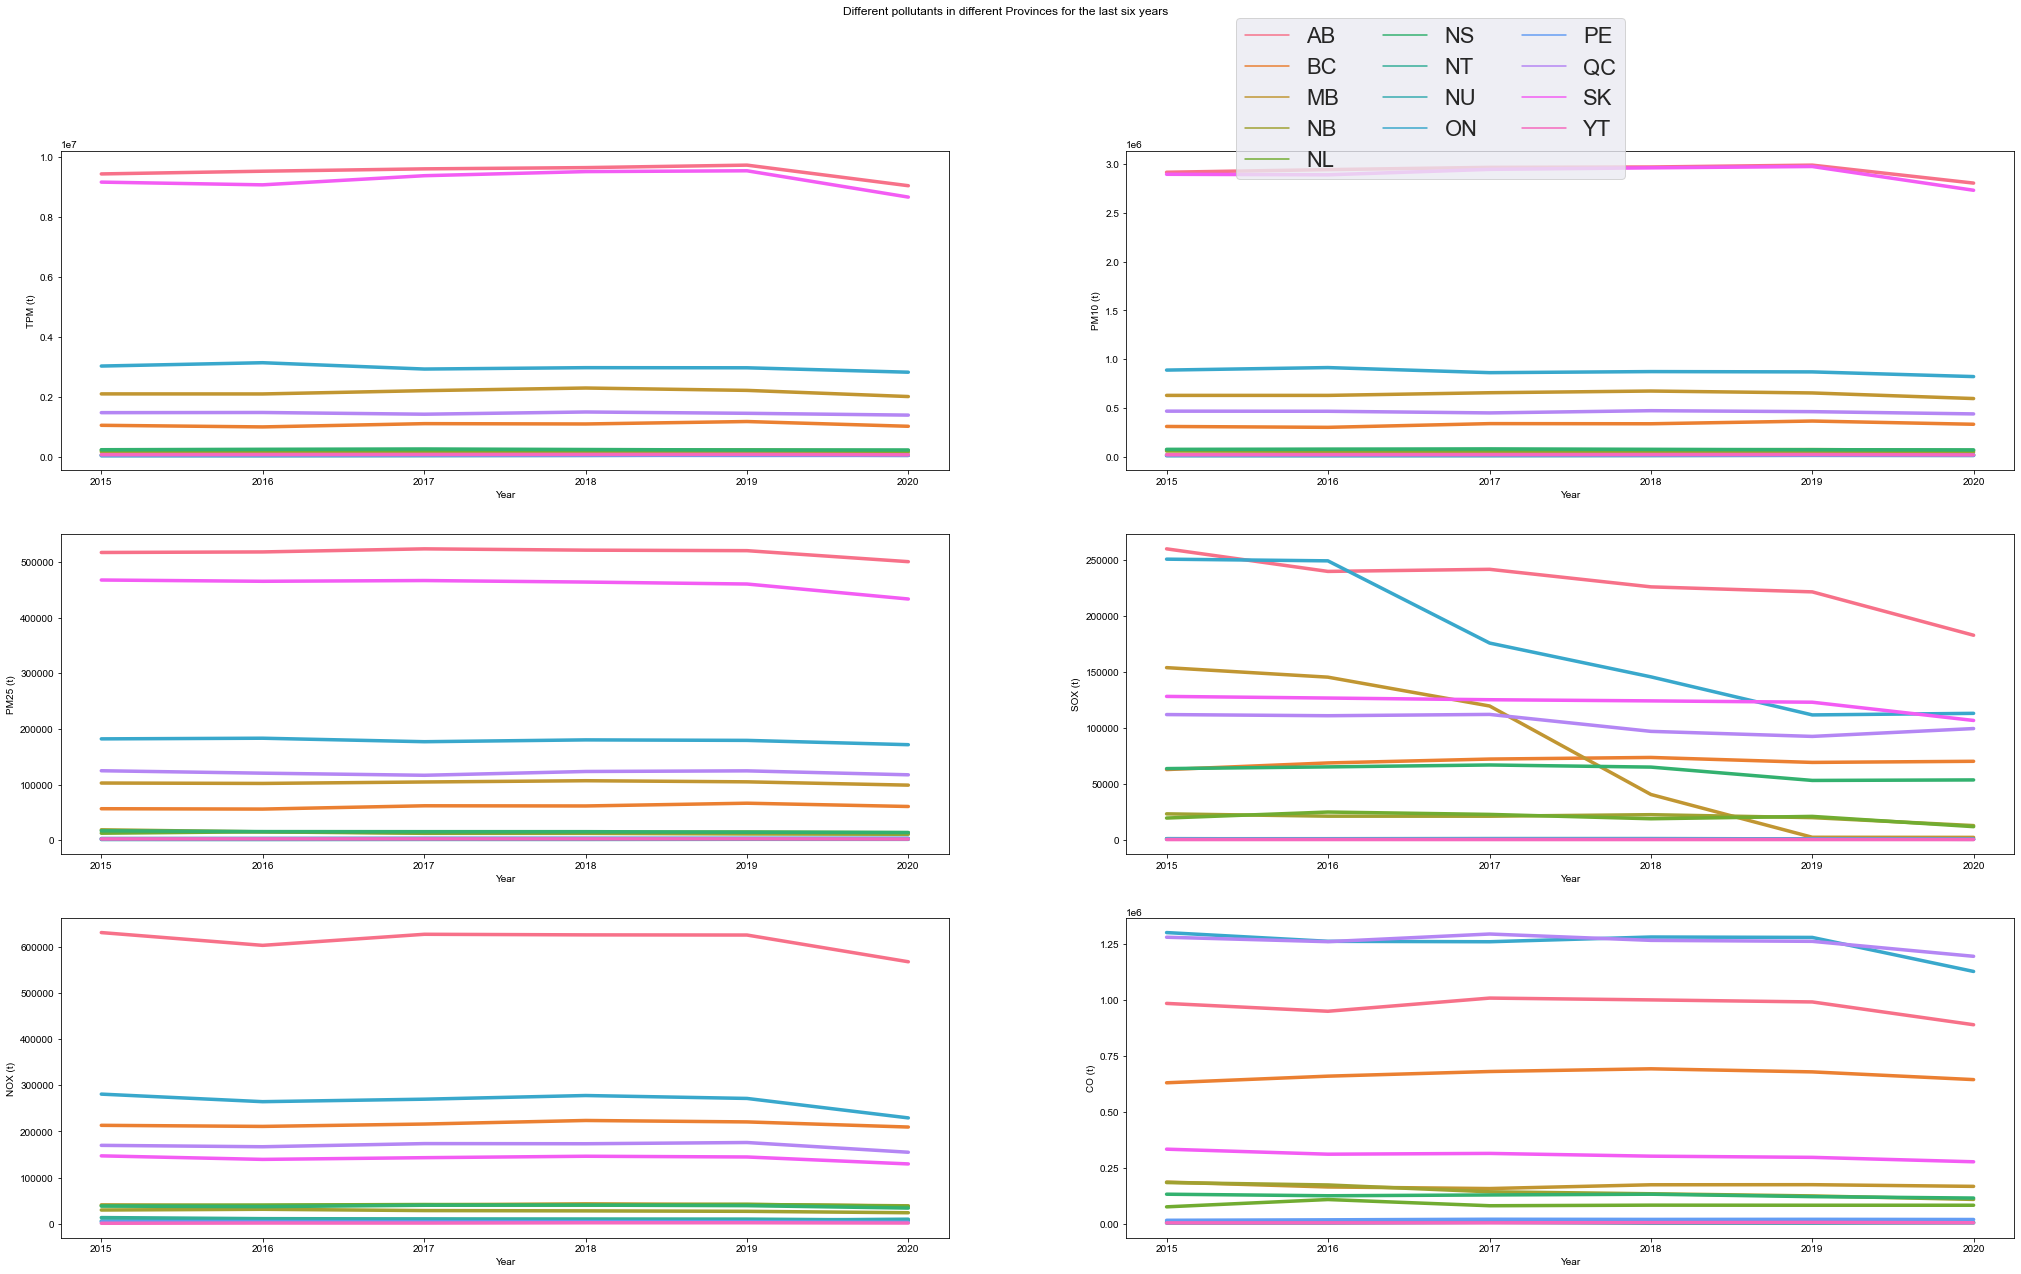

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(35, 20))

# sns.set(font_scale = 2) 
fig.suptitle('Different pollutants in different Provinces for the last six years')
sns.set(font_scale = 2)
ax=sns.lineplot(ax=axes[0, 0], x=data_f2['Year'], y=data_f2['TPM (t)'], hue=data_f2['Region'], linewidth=3.5)
ax.get_legend().remove()
ax=sns.lineplot(ax=axes[0, 1], x=data_f2['Year'], y=data_f2['PM10 (t)'], hue=data_f2['Region'], linewidth=3.5)
ax.get_legend().remove()
ax=sns.lineplot(ax=axes[1, 0], x=data_f2['Year'], y=data_f2['PM25 (t)'], hue=data_f2['Region'], linewidth=3.5)
ax.get_legend().remove()
ax=sns.lineplot(ax=axes[1, 1], x=data_f2['Year'], y=data_f2['SOX (t)'], hue=data_f2['Region'], linewidth=3.5)
ax.get_legend().remove()
ax=sns.lineplot(ax=axes[2, 0], x=data_f2['Year'], y=data_f2['NOX (t)'], hue=data_f2['Region'], linewidth=3.5)
ax.get_legend().remove()
ax=sns.lineplot(ax=axes[2, 1], x=data_f2['Year'], y=data_f2['CO (t)'], hue=data_f2['Region'], linewidth=3.5)
ax.get_legend().remove()
# add legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=3, bbox_to_anchor=(.75, 0.98))

Graphical representation shows that the maximum levels of TPM, PM10 and PM25 is observed in AB and BC, followed by ON and MB.Levels of SOX were found to decrease significantly in AB, ON and MB from 2016 onwards.Amounts of NOX was highest in AB followed by MB. However, CO levels were highest in ON and PE respectively. 

In [16]:
# Correlation matrix between all the features 
Corr_dataf2=data_f2.corr()
Corr_dataf2

,TPM (t),PM10 (t),PM25 (t),SOX (t),NOX (t),CO (t)
TPM (t),1.000000,0.999778,0.995311,0.765920,0.750262,0.426207
PM10 (t),0.999778,1.000000,0.994589,0.758076,0.742791,0.417862
PM25 (t),0.995311,0.994589,1.000000,0.802477,0.793937,0.500818
SOX (t),0.765920,0.758076,0.802477,1.000000,0.854415,0.765636
NOX (t),0.750262,0.742791,0.793937,0.854415,1.000000,0.743730
CO (t),0.426207,0.417862,0.500818,0.765636,0.743730,1.000000


<AxesSubplot:>

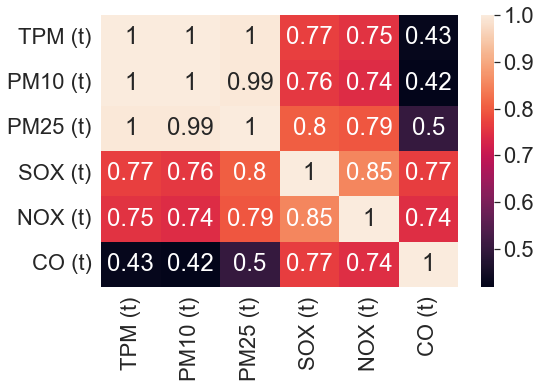

In [17]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(Corr_dataf2, annot=True, ax=ax)

Correlation matrix shows that significantly high positive correlation is observed between TPM, PM10 and PM25. However, SOX and NOX, too show lower levels of positive correlation.

In [18]:
# BOXPLOTS
#melt data frame into long format
df_melted = pd.melt(data_f2)

df_melted.head(2)


,variable,value
0,Region,AB
1,Region,BC


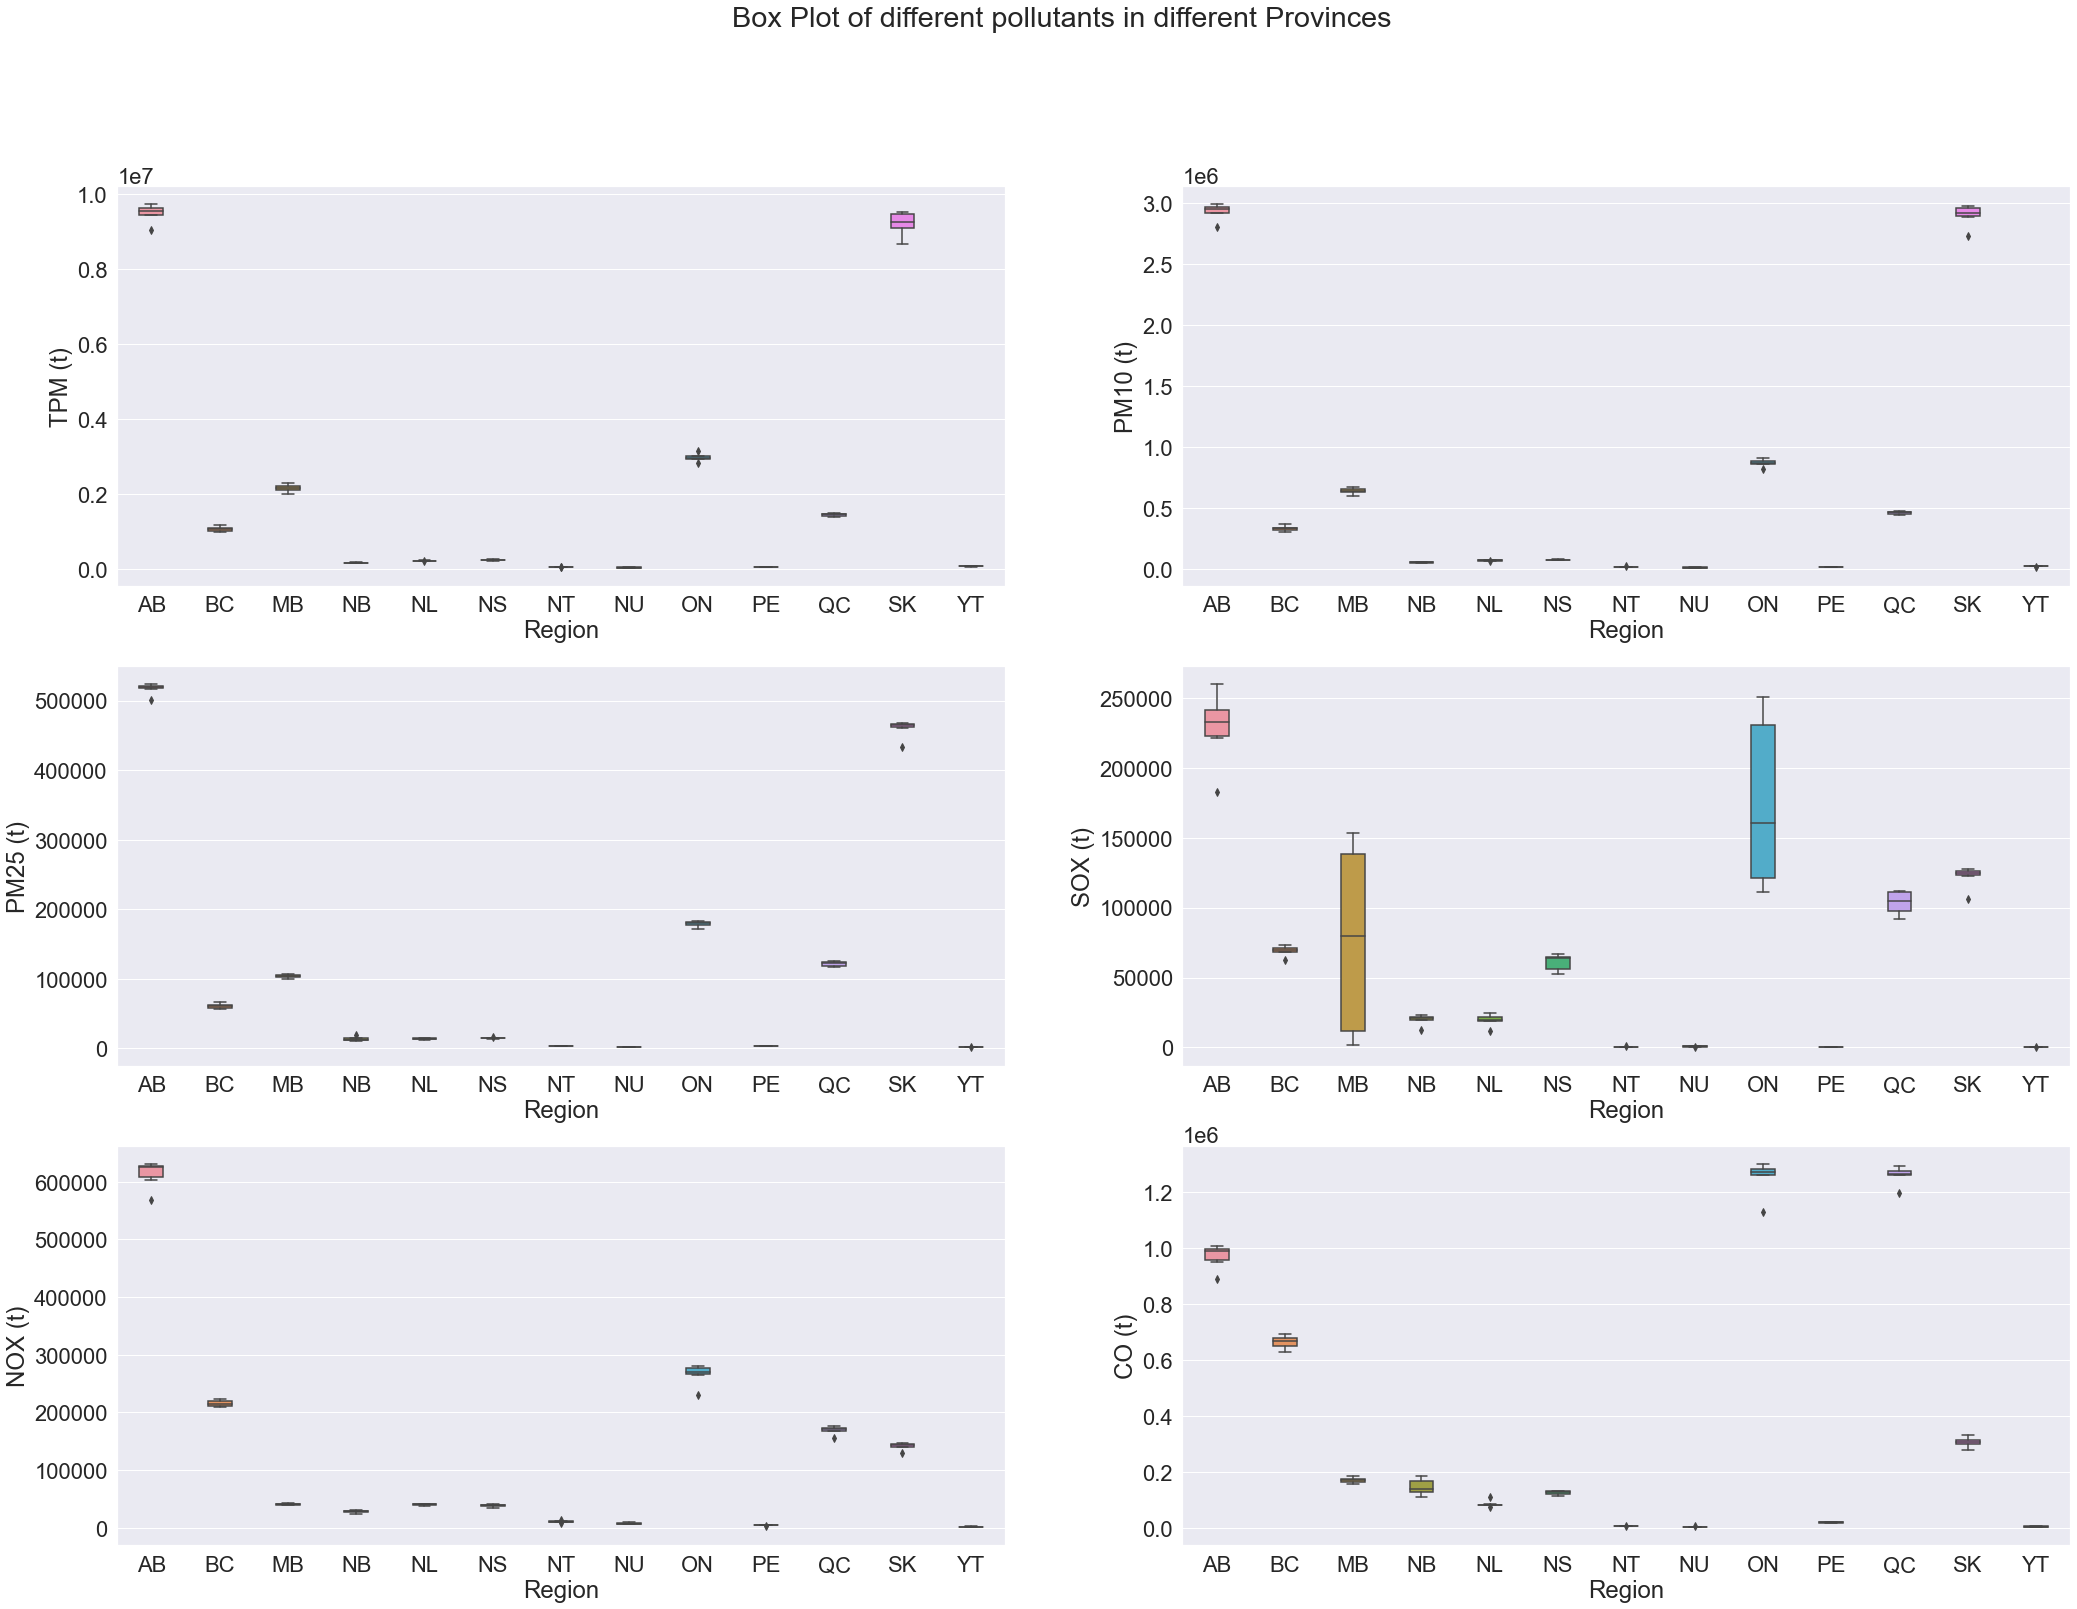

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(35, 25))


fig.suptitle('Box Plot of different pollutants in different Provinces')
# sns.set(font_scale = 2)

ax=sns.boxplot(ax=axes[0, 0], x=data_f2['Region'], y=data_f2['TPM (t)'], width=0.35)

ax=sns.boxplot(ax=axes[0, 1], x=data_f2['Region'], y=data_f2['PM10 (t)'], width=0.35)

ax=sns.boxplot(ax=axes[1, 0], x=data_f2['Region'], y=data_f2['PM25 (t)'], width=0.35)

ax=sns.boxplot(ax=axes[1, 1], x=data_f2['Region'], y=data_f2['SOX (t)'], width=0.35)

ax=sns.boxplot(ax=axes[2, 0], x=data_f2['Region'], y=data_f2['NOX (t)'], width=0.35)

ax=sns.boxplot(ax=axes[2, 1], x=data_f2['Region'], y=data_f2['CO (t)'], width=0.35)

plt.show()




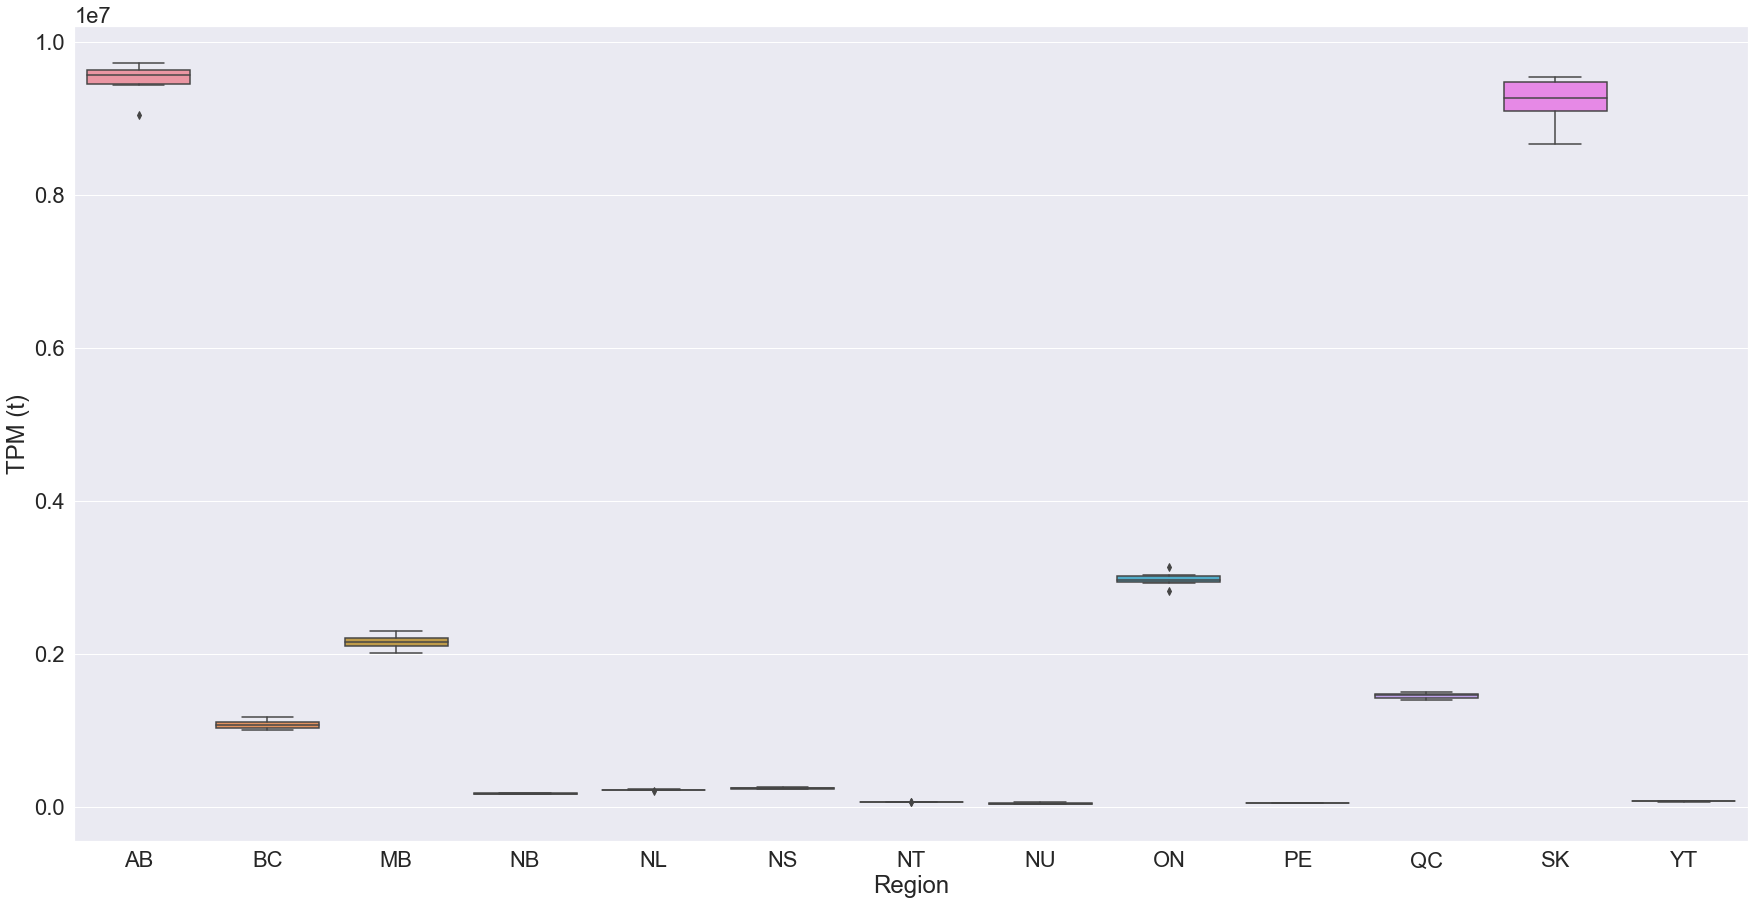

In [20]:
plt.figure(figsize=(30,15))
sns.boxplot(x=data_f2['Region'], y=data_f2['TPM (t)'])
plt.show()

As the graphs in subplots were too small to depict significant information, therefore individual graphs were prepared.

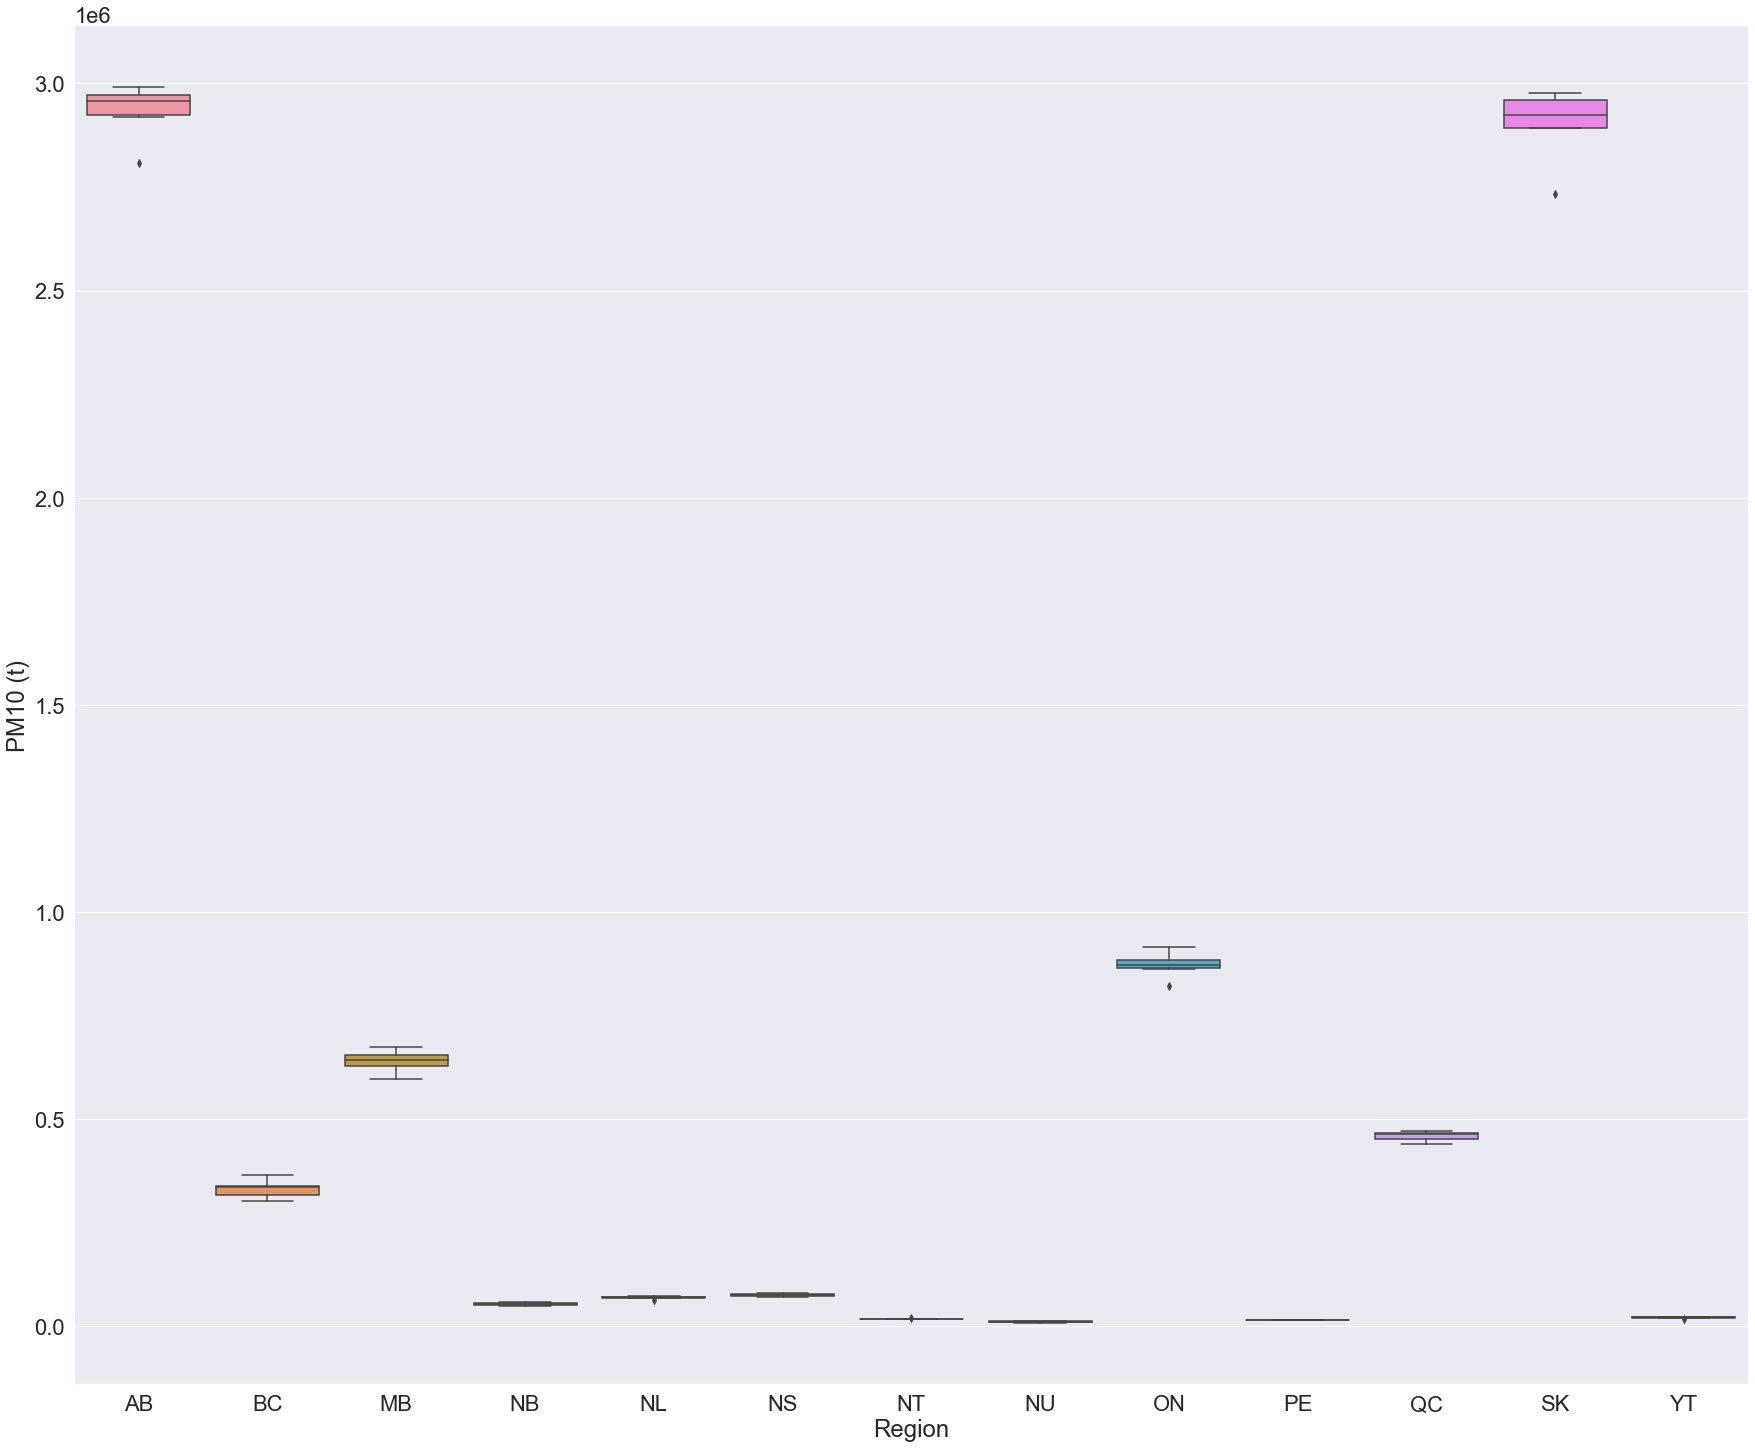

In [21]:
plt.figure(figsize=(30,25))
sns.boxplot(x=data_f2['Region'], y=data_f2['PM10 (t)'])
plt.show()

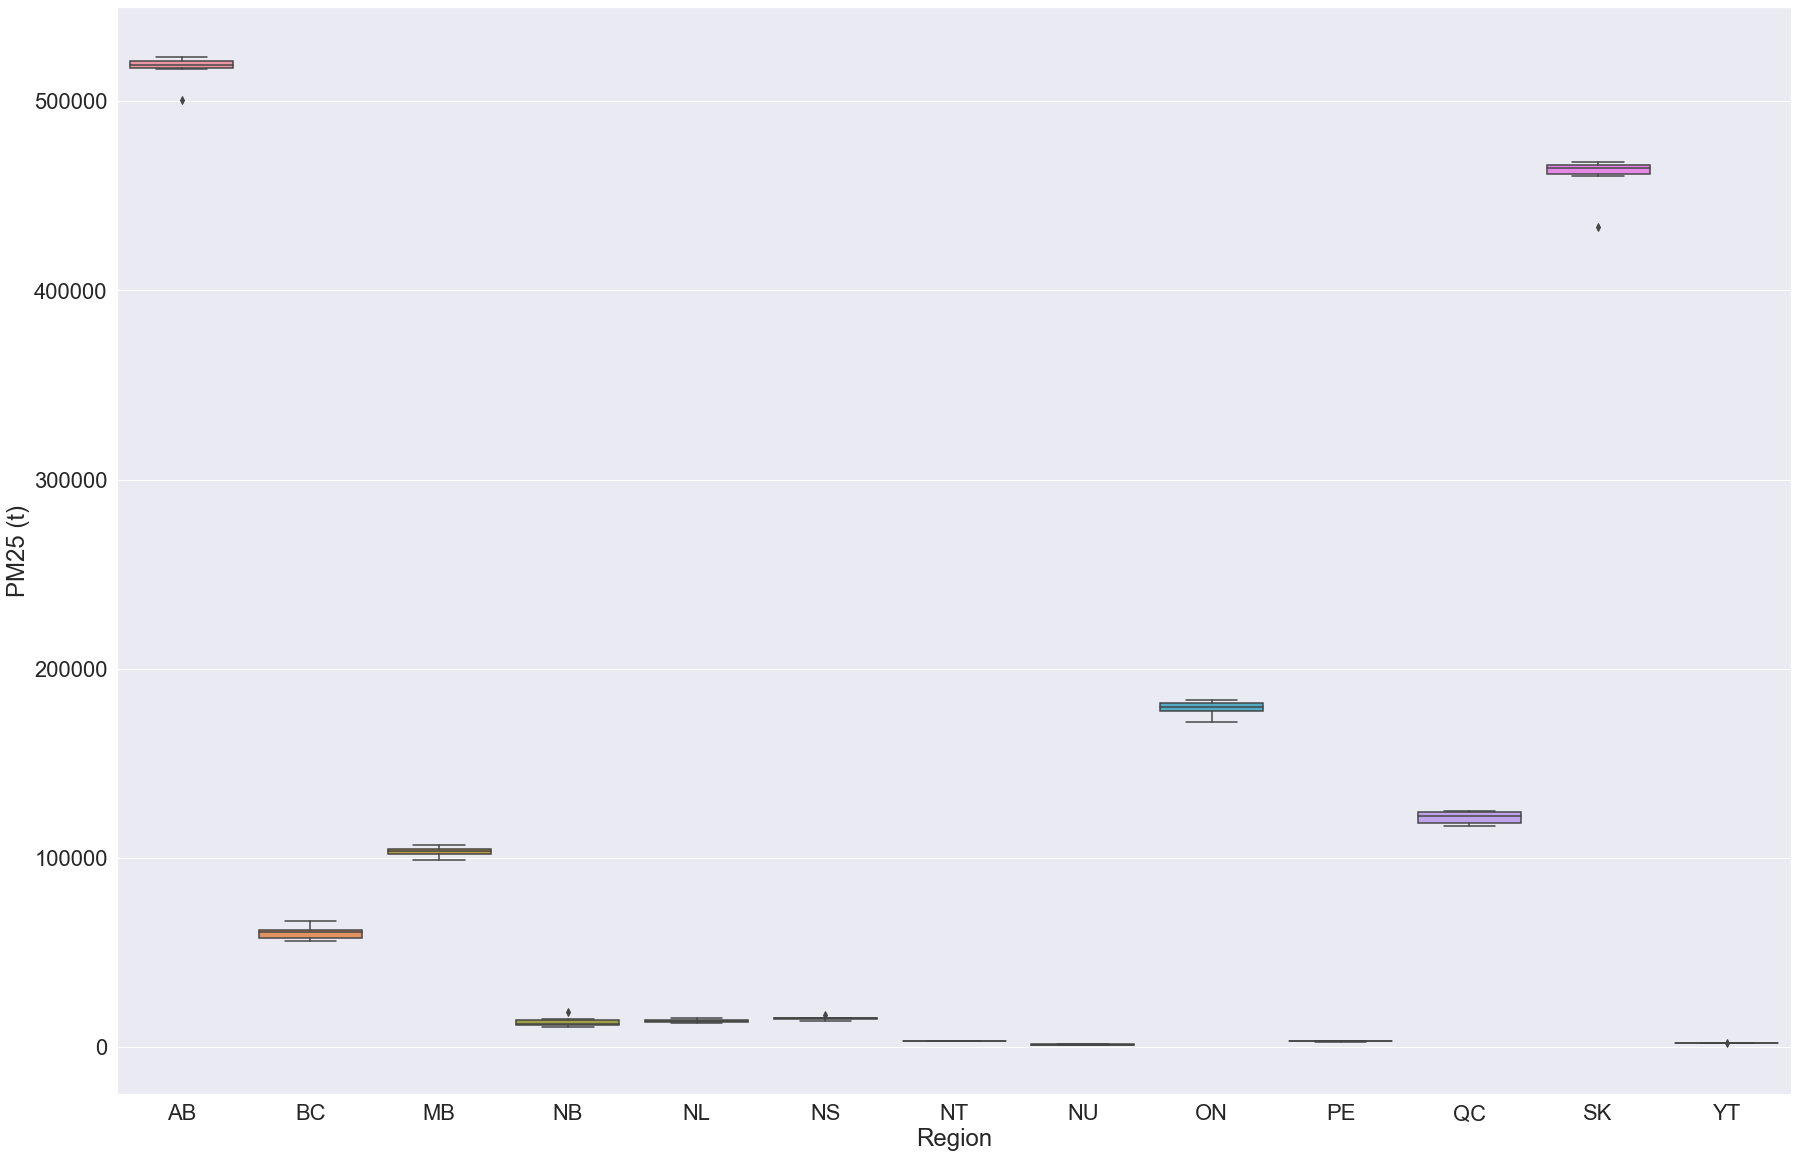

In [22]:
plt.figure(figsize=(30,20))
# ax = sns.barplot(x="Word", y="Frequency", data=boxdata)
sns.boxplot(x=data_f2['Region'], y=data_f2['PM25 (t)'])
plt.show()

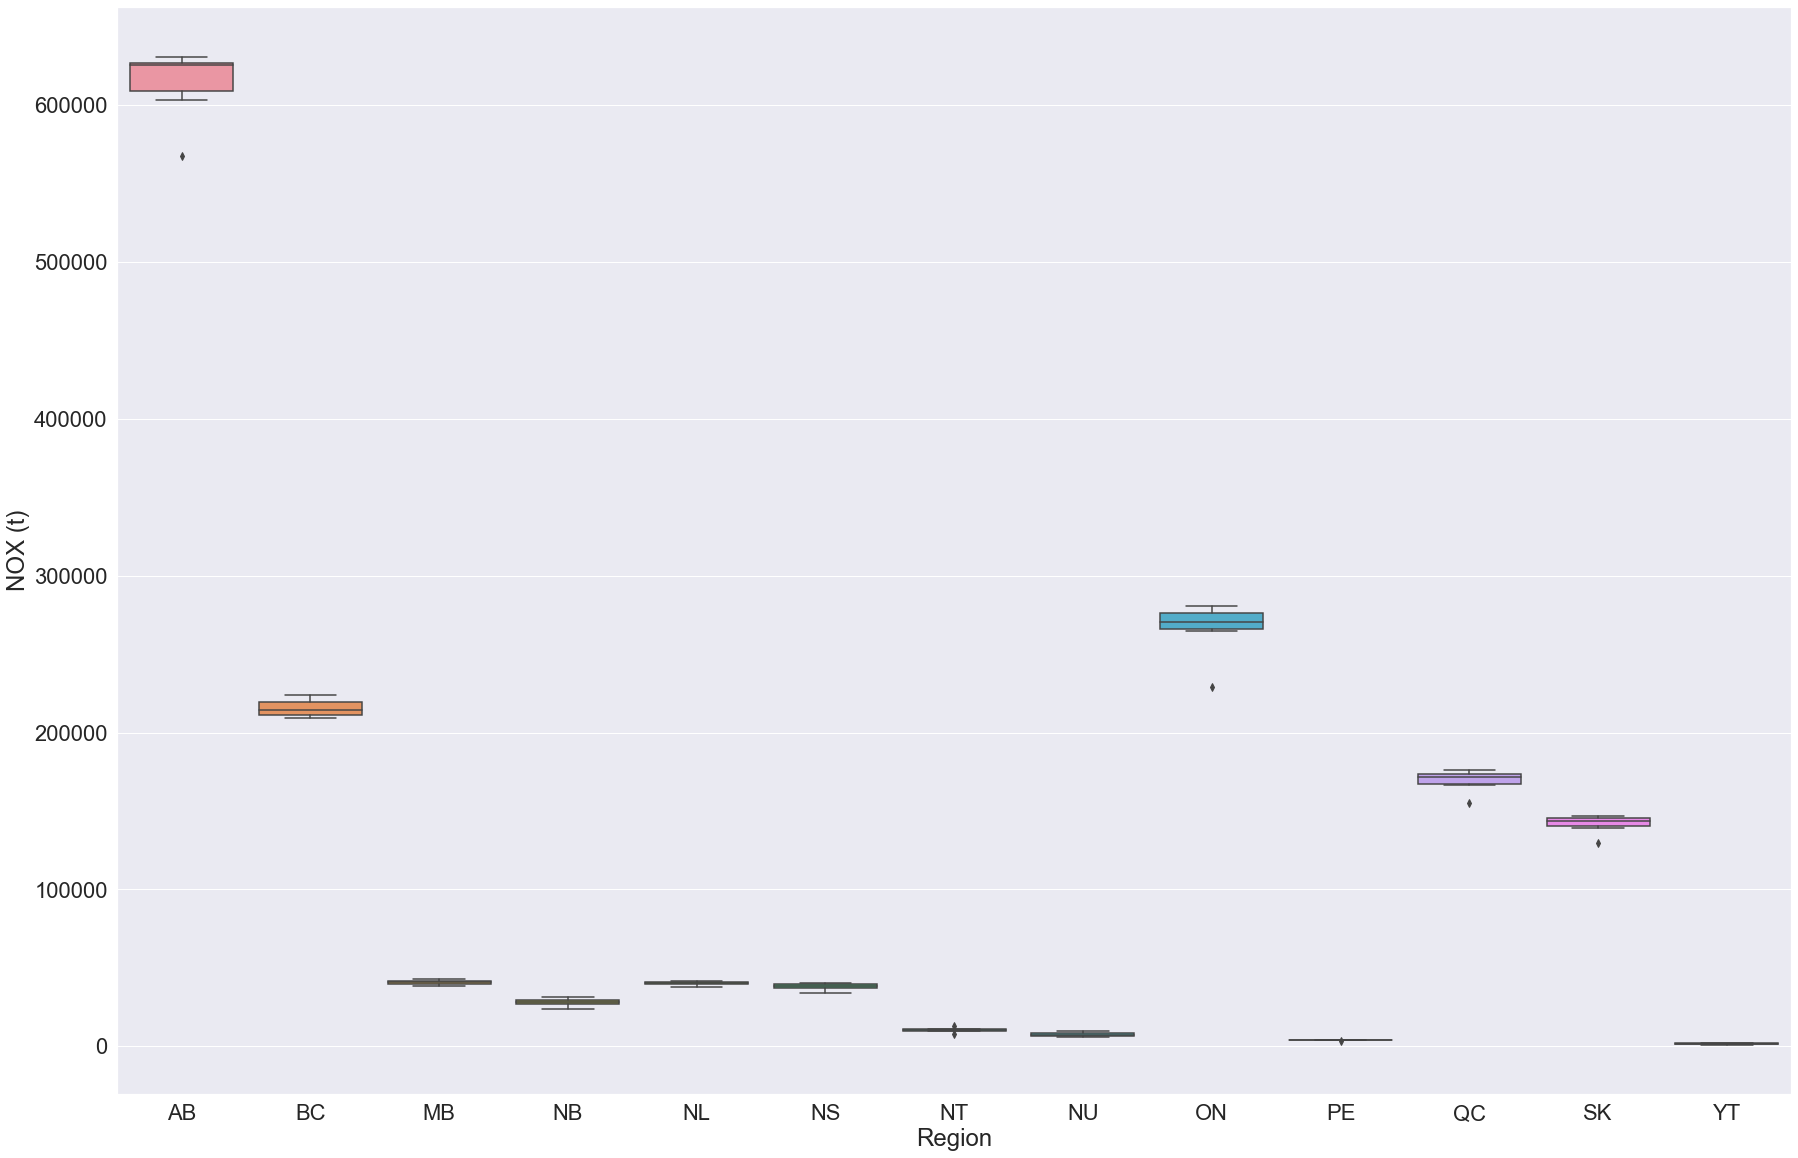

In [23]:
plt.figure(figsize=(30,20))
sns.boxplot(x=data_f2['Region'], y=data_f2['NOX (t)'])
plt.show()

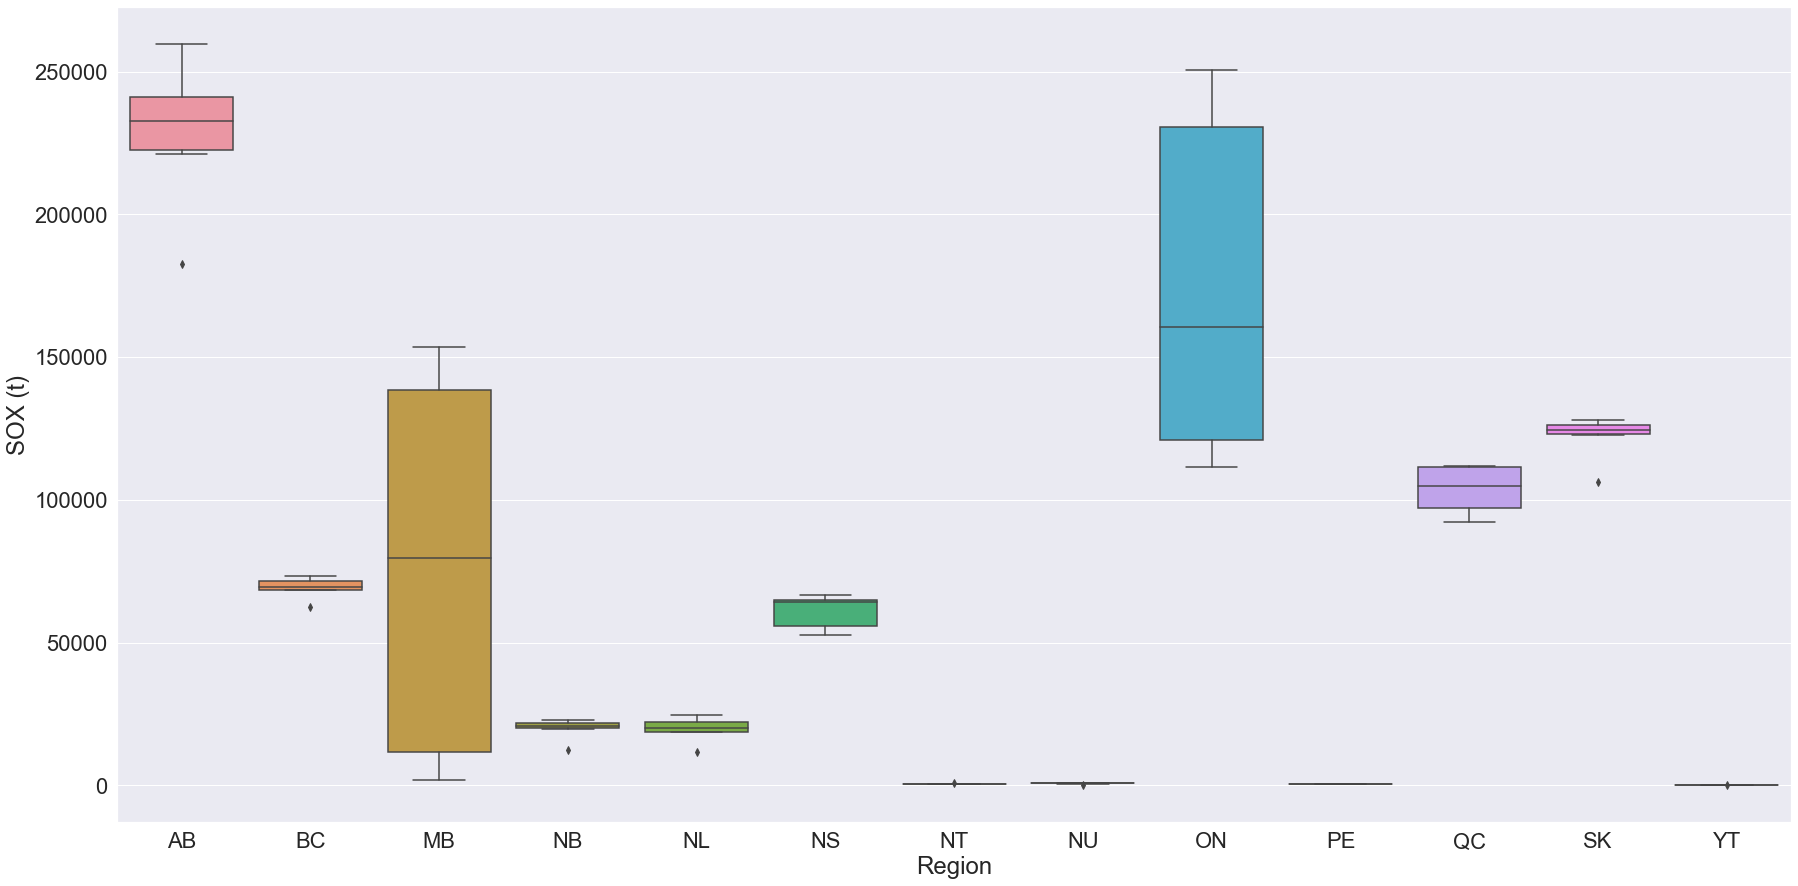

In [24]:
plt.figure(figsize=(30,15))
sns.boxplot(x=data_f2['Region'], y=data_f2['SOX (t)'])
plt.show()

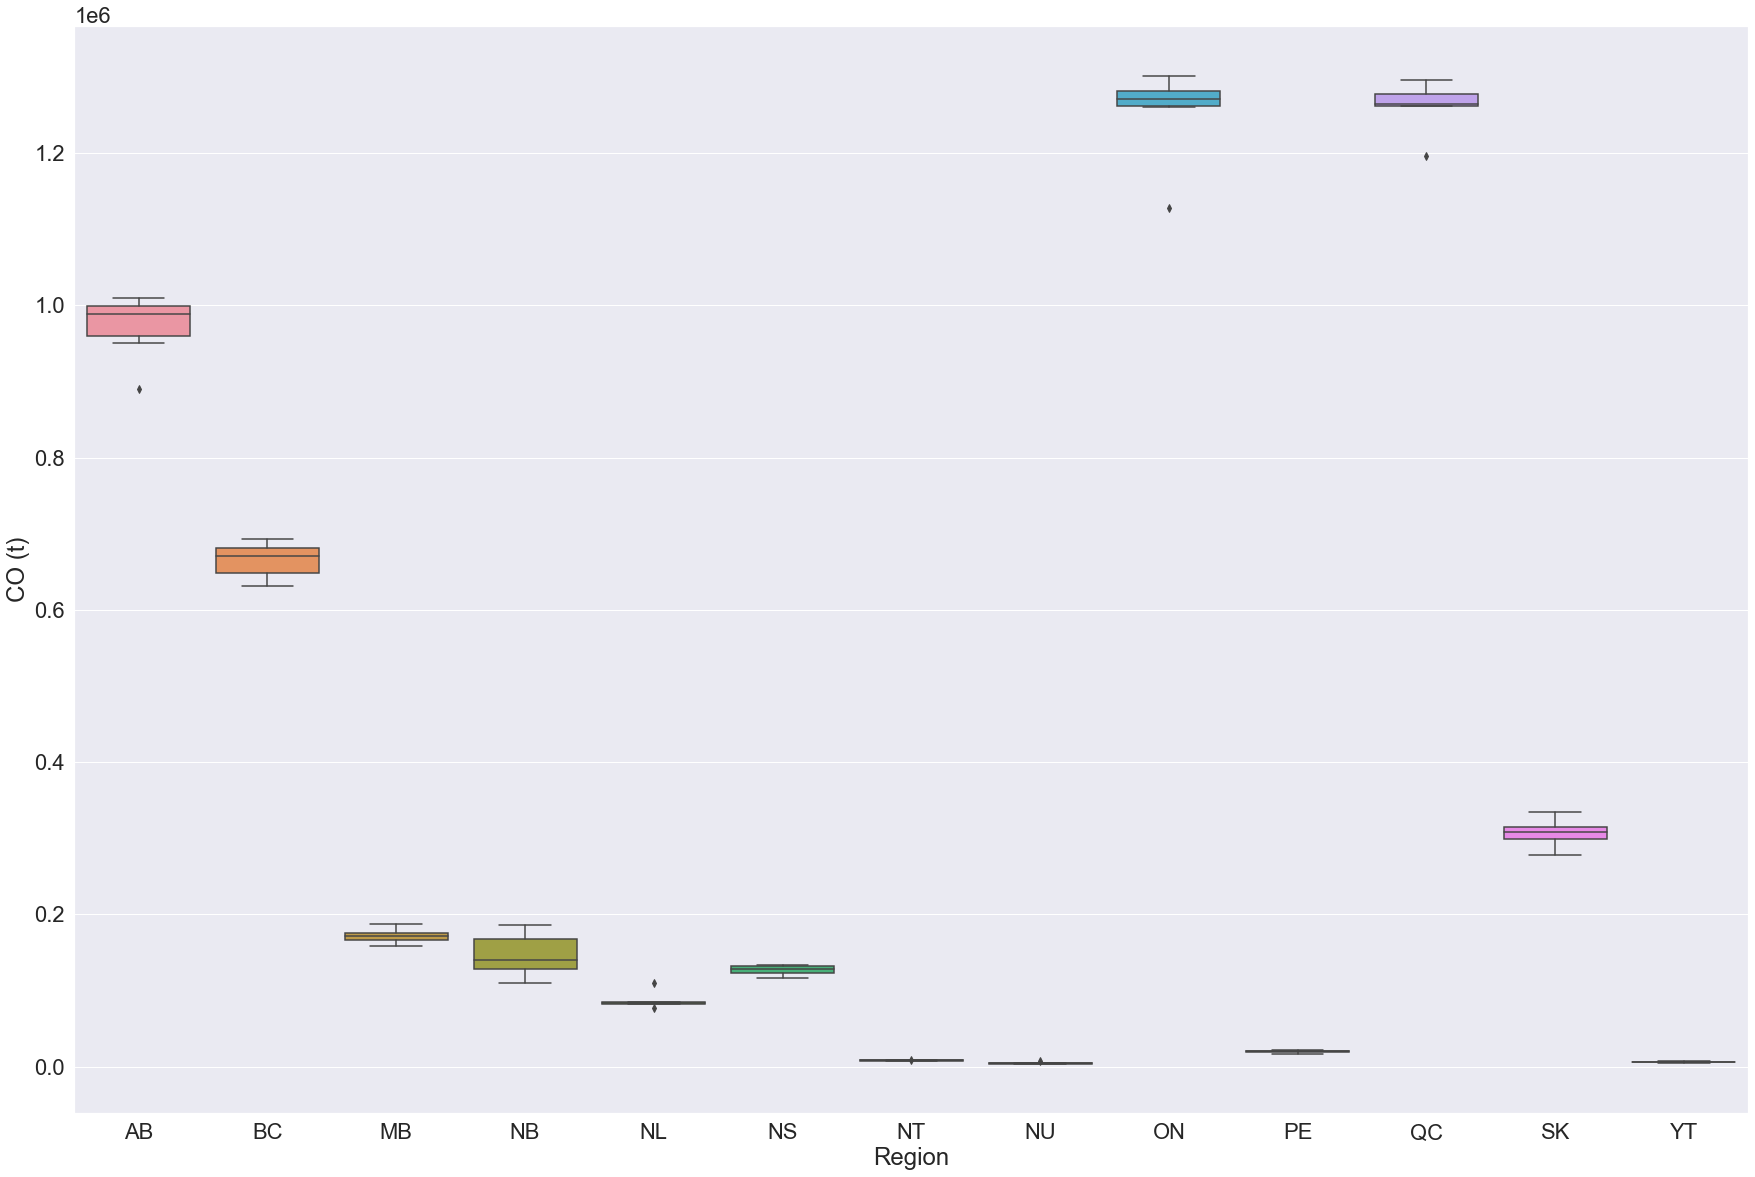

In [25]:
plt.figure(figsize=(30,20))
sns.boxplot(x=data_f2['Region'], y=data_f2['CO (t)'])
plt.show()

Boxplot analysis showed that maximum TPM, PM10 and PM25 was observed in AB. Large variations were observed in SOX amounts in MB and ON, where there was large gap in minimum and maximum value.

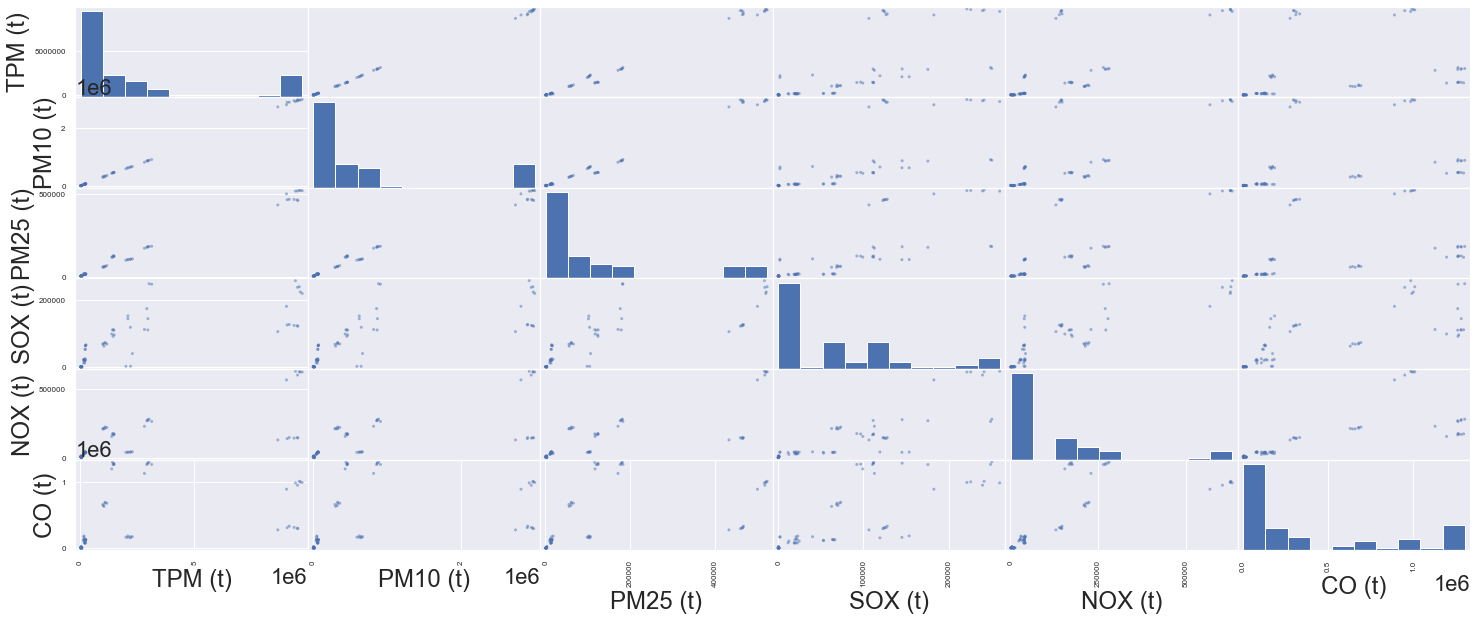

In [26]:
# for correlation use `scatter_matrix()` function from `pandas.plotting`
Scatter_plot_matrix=pd.plotting.scatter_matrix(data_f2, alpha=0.5,figsize=(25, 10))

Scattermatrix analysis too revealed significant positive relationship between TPM, PM10 and PM25. Therefore considering the highest TPM producing province for the last 6 years and boxplot & Scatter matrix plot analysis, So 'TPM (t)' in Alberta (AB) was taken for further prediction studies using ARIMA.  

Goal 2 : The project further aims to predict the forecasting of pollutants level (in the province with maximum levels) using ARIMA model for time series forcasting

ARIMA, short for ‘AutoRegressive Integrated Moving Average’, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

In [27]:
# air_poll1 = air_poll1.loc[(air_poll1['Source'] == 'GRAND TOTAL')]
# gk= air_poll1.groupby('Year')
# groups= ['2015','2016','2017','2018','2019','2020']
# p=pd.concat([gk.get_group(name) for name in groups])
# p
air_poll1.head() 

,Region,Source,Year,TPM (t),PM10 (t),PM25 (t),SOX (t),NOX (t),CO (t)
66725,AB,GRAND TOTAL,1990-01-01,5.978780e+06,1.907847e+06,4.327632e+05,5.124052e+05,6.132843e+05,1.810389e+06
66726,BC,GRAND TOTAL,1990-01-01,8.831160e+05,3.530672e+05,1.553369e+05,1.107474e+05,2.859677e+05,2.340344e+06
66727,CA,GRAND TOTAL,1990-01-01,2.056776e+07,6.668921e+06,1.681698e+06,3.008720e+06,2.273416e+06,1.148239e+07
66728,Unspecified,GRAND TOTAL,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN
66729,MB,GRAND TOTAL,1990-01-01,1.737897e+06,5.310574e+05,1.085912e+05,5.091390e+05,7.257550e+04,3.858356e+05


In [28]:
air_poll_AB=air_poll1.loc[(air_poll1['Region'] == 'AB')] 
air_poll_AB

,Region,Source,Year,TPM (t),PM10 (t),PM25 (t),SOX (t),NOX (t),CO (t)
66725,AB,GRAND TOTAL,1990-01-01,5978779.502,1907847.244,432763.1808,512405.1770,613284.2863,1.810389e+06
66739,AB,GRAND TOTAL,1991-01-01,5743958.858,1831526.344,413358.2570,524144.1848,585705.3258,1.674240e+06
66753,AB,GRAND TOTAL,1992-01-01,5606839.080,1785021.758,399084.8608,564717.7768,609463.5916,1.694347e+06
66767,AB,GRAND TOTAL,1993-01-01,5591054.946,1782291.128,393176.8390,571473.9029,640884.4081,1.670384e+06
66781,AB,GRAND TOTAL,1994-01-01,6258363.422,1976526.893,423314.3876,594900.1604,692547.0958,1.713860e+06
66795,AB,GRAND TOTAL,1995-01-01,5804567.598,1824988.231,384848.8244,569212.5800,718124.9278,1.699242e+06
66809,AB,GRAND TOTAL,1996-01-01,6166730.350,1940178.686,406867.3708,556679.1296,749396.4675,1.707362e+06
66823,AB,GRAND TOTAL,1997-01-01,6809704.555,2135418.518,437543.3544,522989.2640,815873.3172,1.747507e+06
66837,AB,GRAND TOTAL,1998-01-01,5902308.629,1850029.152,370618.2543,493223.8011,829050.8787,1.756031e+06
66851,AB,GRAND TOTAL,1999-01-01,5770905.265,1816597.916,356023.0270,497998.2870,845753.2473,1.734278e+06


In [29]:
AB_auto=air_poll_AB[['Year','TPM (t)']].reset_index(drop=True)
AB_auto

,Year,TPM (t)
0,1990-01-01,5978779.502
1,1991-01-01,5743958.858
2,1992-01-01,5606839.080
3,1993-01-01,5591054.946
4,1994-01-01,6258363.422
5,1995-01-01,5804567.598
6,1996-01-01,6166730.350
7,1997-01-01,6809704.555
8,1998-01-01,5902308.629
9,1999-01-01,5770905.265


In [30]:
AB_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Year     31 non-null     datetime64[ns]
 1   TPM (t)  31 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 624.0 bytes


In [31]:
y=AB_auto['TPM (t)'].astype(int)

In [32]:
# Checking the actual value of p against level of significance 0.5 using adfuller
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(y.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.860881
p-value: 0.800582


The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.Clearly the value of p is more than the level of significance. Therefore we need to increase the order and check the values of d, p, q for best fit.


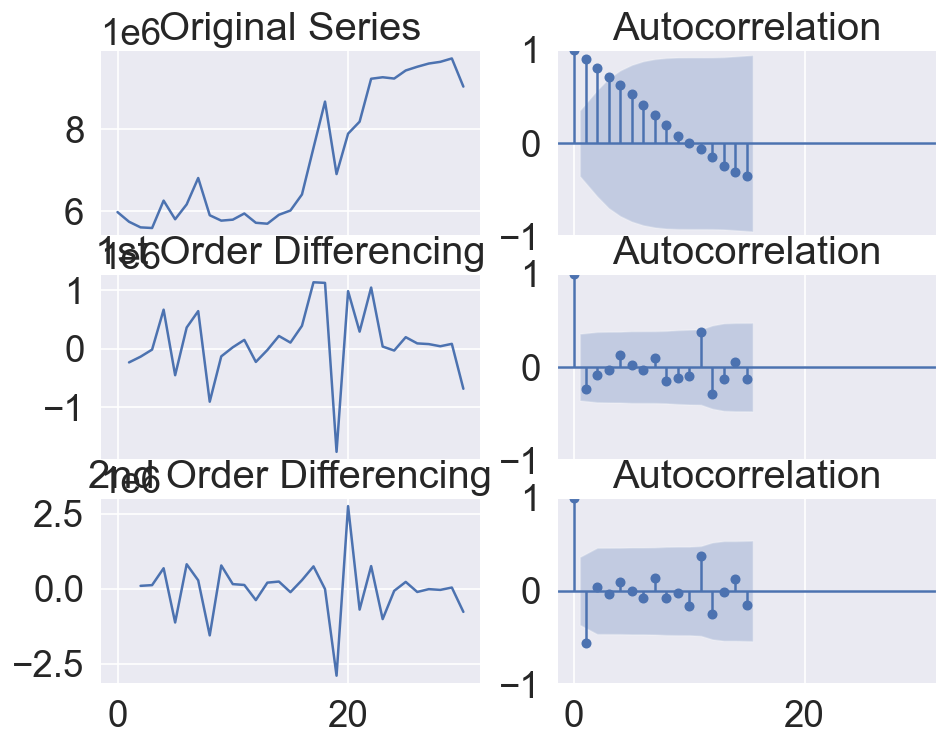

In [33]:
# d value
# Original Series

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(y); axes[0, 0].set_title('Original Series')
plot_acf(y, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(y.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y.diff().diff().dropna(), ax=axes[2, 1])

plt.show()
# plt.xticks(fontsize=14)
# matplotlib.pyplot.xticks(fontsize=14)
# plot.tick_params(axis='x', labelsize=14)




As per the plots we see that 1st order
For the above series, the time series reaches stationarity with two orders of differencing. 
But on looking at the autocorrelation plot for the 2nd differencing the lag goes into the far negative zone 
fairly quick, which indicates, the series might have been over differenced.

So, we are going to fix the order of differencing as 1 for the value of d

In [35]:
# KPSS test
ndiffs(y, test='kpss')  # 1

1

In [36]:
# PP test:
ndiffs(y, test='pp')  # 1

1

Further confirmation comes that KPSS and PP test reveal the value of d to be 1

In [37]:
z=y.copy()
z=pd.Series(z, name='value')
z=z.to_frame()

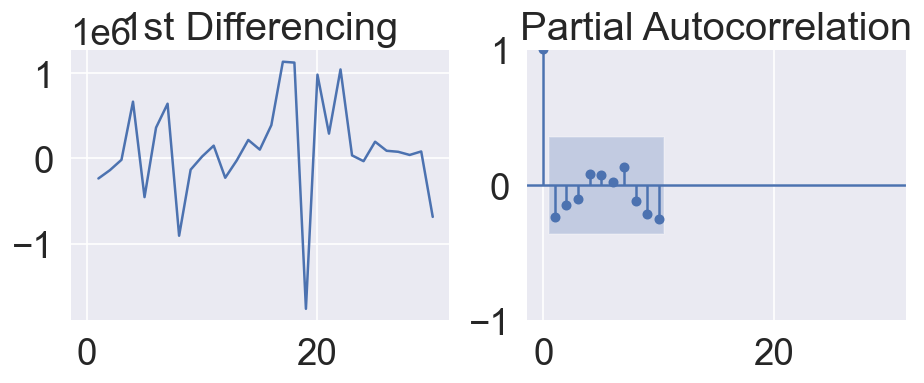

In [38]:
# p value
# PACF plot of 1st differenced series


plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(z.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(z.value.diff().dropna().squeeze(), ax=axes[1], lags=10, method='ywm')

plt.show()


In [39]:
# Just like how we looked at the PACF plot for the number of AR terms, you can look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.

# The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

# # Let’s see the autocorrelation plot of the differenced series.

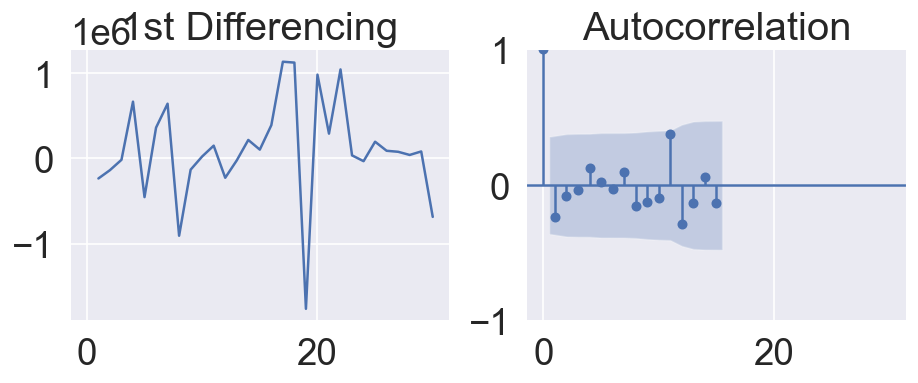

In [40]:
# q value
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(z.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(z.value.diff().dropna(), ax=axes[1])

plt.show()

Couple of lags are well above the significance line. So, let’s tentatively fix q as 2. When in doubt, go with the simpler model that sufficiently explains the Y.

In [41]:
# 1,1,2 ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
# 1,1,2 ARIMA Model

model = ARIMA(z.value, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   31
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -440.800
Date:                Mon, 15 Aug 2022   AIC                            889.601
Time:                        20:26:10   BIC                            895.206
Sample:                             0   HQIC                           891.394
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9983      0.121      8.244      0.000       0.761       1.236
ma.L1         -1.1052      0.304     -3.632      0.000      -1.702      -0.509
ma.L2          0.1129      0.137      0.824      0.4

The model summary reveals a lot of information. The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms.

The P-Value in ‘P>|z|’ column is highly insignificant for ar.L1, MA.L1. It should ideally be less than 0.05 for the respective X to be significant.

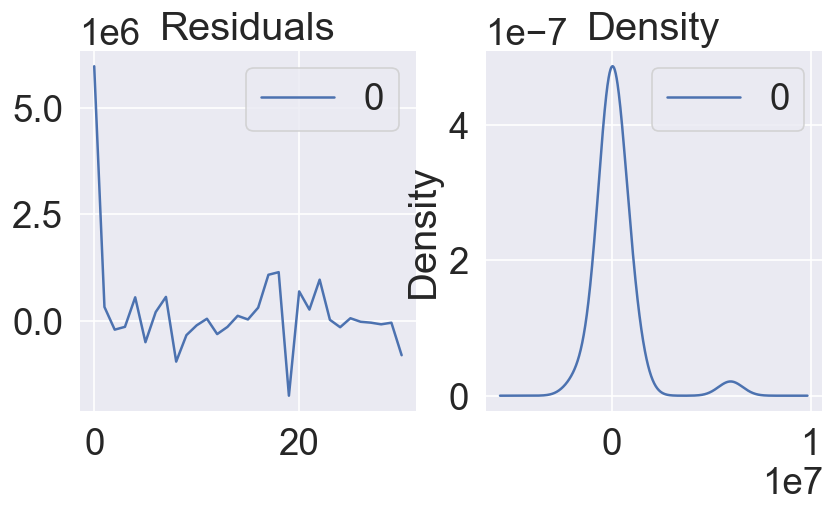

In [42]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0], figsize=(8,4))
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [43]:
# Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).
# The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using plot_predict().

<AxesSubplot:>

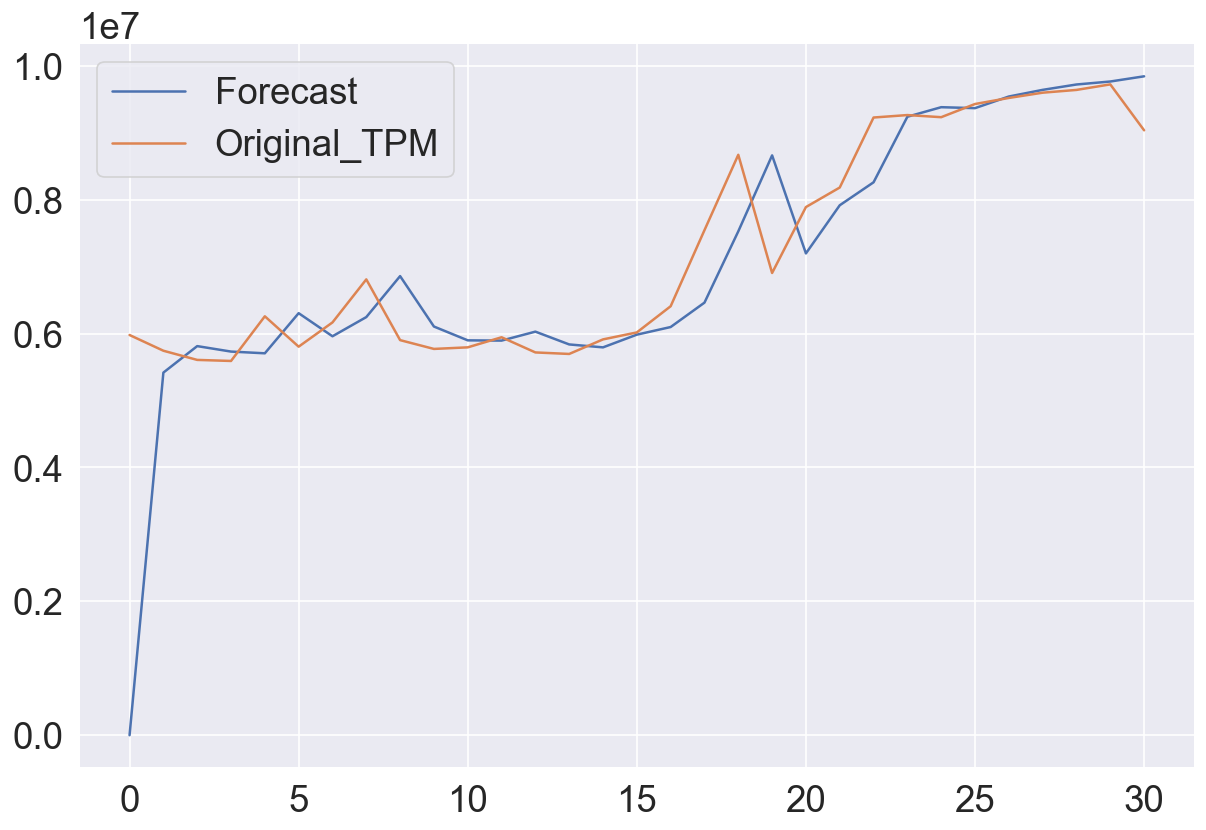

In [44]:

# # Actual vs Fitted
Forecast=model_fit.predict(dynamic=False)
dict1 = {'Original_TPM':y, 'Forecast':Forecast}
df_forecast=pd.DataFrame(dict1)
df_forecast[['Forecast','Original_TPM']].plot(figsize=(12,8))

predicted=6936976.336264, expected=7890214.000000
predicted=7862334.781821, expected=8182042.000000
predicted=8103972.411808, expected=9227953.000000
predicted=9130360.377792, expected=9264491.000000
predicted=9229713.306429, expected=9232886.000000
predicted=9395743.425468, expected=9429753.000000


C:\Users\harvi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\harvi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=9570070.942865, expected=9520242.000000
predicted=9669323.619790, expected=9598800.000000
predicted=9748306.856954, expected=9640249.000000
predicted=9790883.172081, expected=9722865.000000
predicted=9866950.383027, expected=9036858.000000
Test RMSE: 522770.391


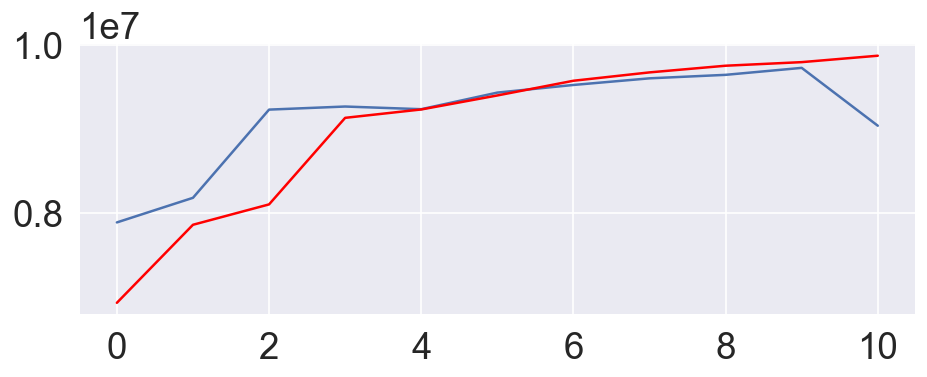

In [45]:
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
size = int(len(y) * 0.66)
train, test = y[0:size], y[size:len(y)].reset_index(drop=True)
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [46]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -425.629
Date:                Mon, 15 Aug 2022   AIC                            859.258
Time:                        20:26:11   BIC                            864.727
Sample:                             0   HQIC                           860.971
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9994      0.058     17.174      0.000       0.885       1.113
ma.L1         -1.1160      0.275     -4.064      0.000      -1.654      -0.578
ma.L2          0.1210      0.136      0.886      0.3

The graph shows the closeness of the actual values and the predicted one. Hence, the ARIMA model has been optimized (as much as possible using the best values of p, q and d) for future air pollutants prediction. 

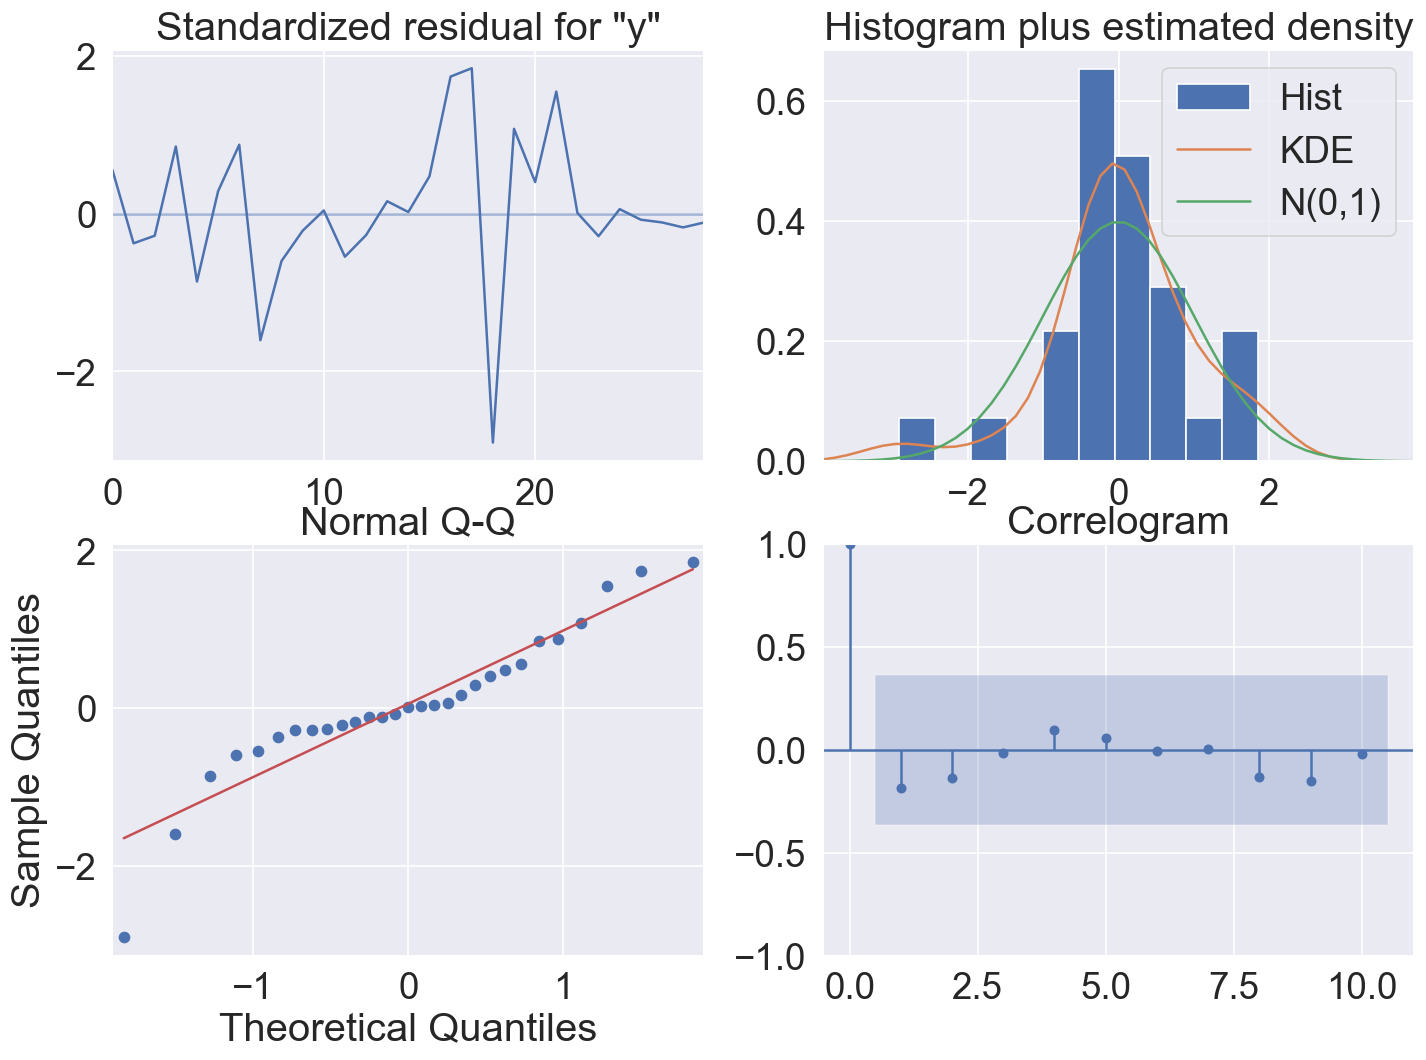

In [47]:
# Let's investigate the residual errors
model_fit.plot_diagnostics(figsize=(14,10))
plt.show()

Again, the plots show that the residuals are not correlated. Thus, the model summary shows that this model is more 
reliable because we can't reject the null hypothesis of (constant variance). 

Goal 3: Sources of Air Pollution in Alberta in 2020

In [48]:
air_poll.head(2)

,Index,Region,Source,Sector,Subsector,Is it a total,Year,TPM (t),PM10 (t),PM25 (t),...,Pb (kg),Cd (kg),Hg (kg),D/F (gTEQ),B(a)p,B(b)f,B(k)f,"I(1,2,3-cd)p",PAH (kg),HCB (g)
0,1,AB,Ore and Mineral Industries,NaN,NaN,y,1990-01-01,29239.29007,8851.836473,2610.591646,...,416.163534,5.772593,92.824010,0.002170,0.407351,1.425729,0.505794,0.407351,2.746226,NaN
1,1,BC,Ore and Mineral Industries,NaN,NaN,y,1990-01-01,26865.92752,12479.265200,6080.348059,...,58.651218,1.861156,3084.899405,0.000274,9.164659,12.693427,12.110903,5.062696,39.031685,0.0146


In [49]:
air_poll_AB_2020=air_poll.loc[(air_poll['Region'] == 'AB') & (air_poll['Year']=='2020')]
air_poll_AB_2020


,Index,Region,Source,Sector,Subsector,Is it a total,Year,TPM (t),PM10 (t),PM25 (t),...,Pb (kg),Cd (kg),Hg (kg),D/F (gTEQ),B(a)p,B(b)f,B(k)f,"I(1,2,3-cd)p",PAH (kg),HCB (g)
411,1,AB,Ore and Mineral Industries,NaN,NaN,y,2020-01-01,3.603354e+04,1.202853e+04,2519.057698,...,840.184723,14.408583,49.44631,0.260495,0.41439,1.633365,0.514534,0.41439,2.976679,116.910000
836,2,AB,NaN,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1261,3,AB,NaN,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1686,4,AB,NaN,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2111,5,AB,NaN,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65436,154,AB,Dust,Unpaved Roads,Unpaved Roads,NaN,2020-01-01,3.195597e+06,9.003184e+05,89671.334040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65861,155,AB,Fires,NaN,NaN,y,2020-01-01,2.848006e+03,2.437926e+03,1715.349637,...,NaN,NaN,NaN,0.410080,151.72960,10.252000,18.453600,348.56800,529.003200,NaN
66286,156,AB,Fires,Prescribed Burning,Prescribed Burning,NaN,2020-01-01,2.809048e+03,2.398968e+03,1679.277600,...,NaN,NaN,NaN,0.410080,151.72960,10.252000,18.453600,348.56800,529.003200,NaN
66711,157,AB,Fires,Structural Fires,Structural Fires,NaN,2020-01-01,3.895780e+01,3.895780e+01,36.072037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
a=air_poll_AB_2020[['Source', 'TPM (t)','PM10 (t)','PM25 (t)','SOX (t)','NOX (t)','CO (t)']]
a.head(2)

,Source,TPM (t),PM10 (t),PM25 (t),SOX (t),NOX (t),CO (t)
411,Ore and Mineral Industries,36033.53938,12028.52684,2519.057698,1433.005955,4420.561484,6916.904833
836,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
AB_S=a.dropna(how='all')
AB_S

,Source,TPM (t),PM10 (t),PM25 (t),SOX (t),NOX (t),CO (t)
411,Ore and Mineral Industries,3.603354e+04,1.202853e+04,2519.057698,1433.005955,4420.561484,6916.904833
2536,Ore and Mineral Industries,1.162271e+04,2.157995e+03,353.228544,167.995744,193.381968,552.519909
2961,Ore and Mineral Industries,7.361394e+03,2.305205e+03,1099.314998,1185.476700,3626.696000,4036.249000
3386,Ore and Mineral Industries,4.625590e+02,1.265800e+02,22.098000,1153.176000,3392.104000,1830.257000
3811,Ore and Mineral Industries,6.757138e+03,2.084860e+03,1014.042998,0.000700,0.055000,0.092000
...,...,...,...,...,...,...,...
65436,Dust,3.195597e+06,9.003184e+05,89671.334040,NaN,NaN,NaN
65861,Fires,2.848006e+03,2.437926e+03,1715.349637,7.586480,374.122085,17357.776220
66286,Fires,2.809048e+03,2.398968e+03,1679.277600,7.586480,369.072000,17141.344000
66711,Fires,3.895780e+01,3.895780e+01,36.072037,NaN,5.050085,216.432224


In [52]:
AB_S.isna().sum()

Source       0
TPM (t)     14
PM10 (t)    14
PM25 (t)    14
SOX (t)     50
NOX (t)     42
CO (t)      40
dtype: int64

In [53]:
AB_S.head()

,Source,TPM (t),PM10 (t),PM25 (t),SOX (t),NOX (t),CO (t)
411,Ore and Mineral Industries,36033.539380,12028.526840,2519.057698,1433.005955,4420.561484,6916.904833
2536,Ore and Mineral Industries,11622.706340,2157.995360,353.228544,167.995744,193.381968,552.519909
2961,Ore and Mineral Industries,7361.394371,2305.205431,1099.314998,1185.476700,3626.696000,4036.249000
3386,Ore and Mineral Industries,462.559000,126.580000,22.098000,1153.176000,3392.104000,1830.257000
3811,Ore and Mineral Industries,6757.138371,2084.860431,1014.042998,0.000700,0.055000,0.092000


In [54]:
AB_S.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 411 to 67166
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Source    134 non-null    object 
 1   TPM (t)   120 non-null    float64
 2   PM10 (t)  120 non-null    float64
 3   PM25 (t)  120 non-null    float64
 4   SOX (t)   84 non-null     float64
 5   NOX (t)   92 non-null     float64
 6   CO (t)    94 non-null     float64
dtypes: float64(6), object(1)
memory usage: 8.4+ KB


In [55]:
AB_S=AB_S.drop(AB_S[AB_S['Source']=='GRAND TOTAL'].index) 
AB_S

,Source,TPM (t),PM10 (t),PM25 (t),SOX (t),NOX (t),CO (t)
411,Ore and Mineral Industries,3.603354e+04,12028.526840,2519.057698,1433.005955,4420.561484,6916.904833
2536,Ore and Mineral Industries,1.162271e+04,2157.995360,353.228544,167.995744,193.381968,552.519909
2961,Ore and Mineral Industries,7.361394e+03,2305.205431,1099.314998,1185.476700,3626.696000,4036.249000
3386,Ore and Mineral Industries,4.625590e+02,126.580000,22.098000,1153.176000,3392.104000,1830.257000
3811,Ore and Mineral Industries,6.757138e+03,2084.860431,1014.042998,0.000700,0.055000,0.092000
...,...,...,...,...,...,...,...
65011,Dust,8.439672e+04,16671.118890,4261.264578,NaN,NaN,NaN
65436,Dust,3.195597e+06,900318.431800,89671.334040,NaN,NaN,NaN
65861,Fires,2.848006e+03,2437.925800,1715.349637,7.586480,374.122085,17357.776220
66286,Fires,2.809048e+03,2398.968000,1679.277600,7.586480,369.072000,17141.344000


In [56]:
AB_S = AB_S.groupby('Source').apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)
AB_S

C:\Users\harvi\AppData\Local\Temp\ipykernel_40080\2550893313.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  AB_S = AB_S.groupby('Source').apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)


,Source,TPM (t),PM10 (t),PM25 (t),SOX (t),NOX (t),CO (t)
0,Ore and Mineral Industries,3.603354e+04,12028.526840,2519.057698,1433.005955,4420.561484,6916.904833
1,Ore and Mineral Industries,1.162271e+04,2157.995360,353.228544,167.995744,193.381968,552.519909
2,Ore and Mineral Industries,7.361394e+03,2305.205431,1099.314998,1185.476700,3626.696000,4036.249000
3,Ore and Mineral Industries,4.625590e+02,126.580000,22.098000,1153.176000,3392.104000,1830.257000
4,Ore and Mineral Industries,6.757138e+03,2084.860431,1014.042998,0.000700,0.055000,0.092000
...,...,...,...,...,...,...,...
128,Dust,8.439672e+04,16671.118890,4261.264578,NaN,NaN,NaN
129,Dust,3.195597e+06,900318.431800,89671.334040,NaN,NaN,NaN
130,Fires,2.848006e+03,2437.925800,1715.349637,7.586480,374.122085,17357.776220
131,Fires,2.809048e+03,2398.968000,1679.277600,7.586480,369.072000,17141.344000


In [57]:
AB_S=AB_S.fillna(0)
AB_S

,Source,TPM (t),PM10 (t),PM25 (t),SOX (t),NOX (t),CO (t)
0,Ore and Mineral Industries,3.603354e+04,12028.526840,2519.057698,1433.005955,4420.561484,6916.904833
1,Ore and Mineral Industries,1.162271e+04,2157.995360,353.228544,167.995744,193.381968,552.519909
2,Ore and Mineral Industries,7.361394e+03,2305.205431,1099.314998,1185.476700,3626.696000,4036.249000
3,Ore and Mineral Industries,4.625590e+02,126.580000,22.098000,1153.176000,3392.104000,1830.257000
4,Ore and Mineral Industries,6.757138e+03,2084.860431,1014.042998,0.000700,0.055000,0.092000
...,...,...,...,...,...,...,...
128,Dust,8.439672e+04,16671.118890,4261.264578,0.000000,0.000000,0.000000
129,Dust,3.195597e+06,900318.431800,89671.334040,0.000000,0.000000,0.000000
130,Fires,2.848006e+03,2437.925800,1715.349637,7.586480,374.122085,17357.776220
131,Fires,2.809048e+03,2398.968000,1679.277600,7.586480,369.072000,17141.344000


In [58]:
AB_S['T_TPM'] = AB_S.groupby(['Source'])['TPM (t)'].transform('sum')
AB_S['T_PM10'] = AB_S.groupby(['Source'])['PM10 (t)'].transform('sum')
AB_S['T_PM25'] = AB_S.groupby(['Source'])['PM25 (t)'].transform('sum')
AB_S['T_SOX'] = AB_S.groupby(['Source'])['SOX (t)'].transform('sum')
AB_S['T_NOX'] = AB_S.groupby(['Source'])['NOX (t)'].transform('sum')
AB_S['T_CO'] = AB_S.groupby(['Source'])['CO (t)'].transform('sum')


In [59]:
AB_S_T = AB_S.drop_duplicates('Source')
AB_S_T
AB_S_T = AB_S_T.drop(['TPM (t)','PM10 (t)', 'PM25 (t)','SOX (t)','NOX (t)', 'CO (t)'], axis=1)


In [60]:
AB_S_T.loc[:,'Source']

0                    Ore and Mineral Industries
23                         Oil and Gas Industry
40        Electric Power Generation (Utilities)
46                                Manufacturing
73          Transportation and Mobile Equipment
90                                  Agriculture
99     Commercial / Residential / Institutional
108                      Incineration and Waste
119                         Paints and Solvents
124                                        Dust
130                                       Fires
Name: Source, dtype: object

In [61]:
AB_S_T.head()

,Source,T_TPM,T_PM10,T_PM25,T_SOX,T_NOX,T_CO
0,Ore and Mineral Industries,100863.271424,35469.748132,7531.396575,6786.679258,1.768064e+04,2.903490e+04
23,Oil and Gas Industry,56035.574406,37694.892479,25832.728020,451274.445536,1.120993e+06,1.234127e+06
40,Electric Power Generation (Utilities),5119.444450,3770.598950,1971.800900,122544.829144,9.355241e+04,2.195712e+04
46,Manufacturing,81306.613466,25489.336222,9565.681629,31563.238519,8.680084e+04,1.215418e+05
73,Transportation and Mobile Equipment,15835.534571,15796.026348,12178.772828,353.411055,2.886114e+05,8.749704e+05


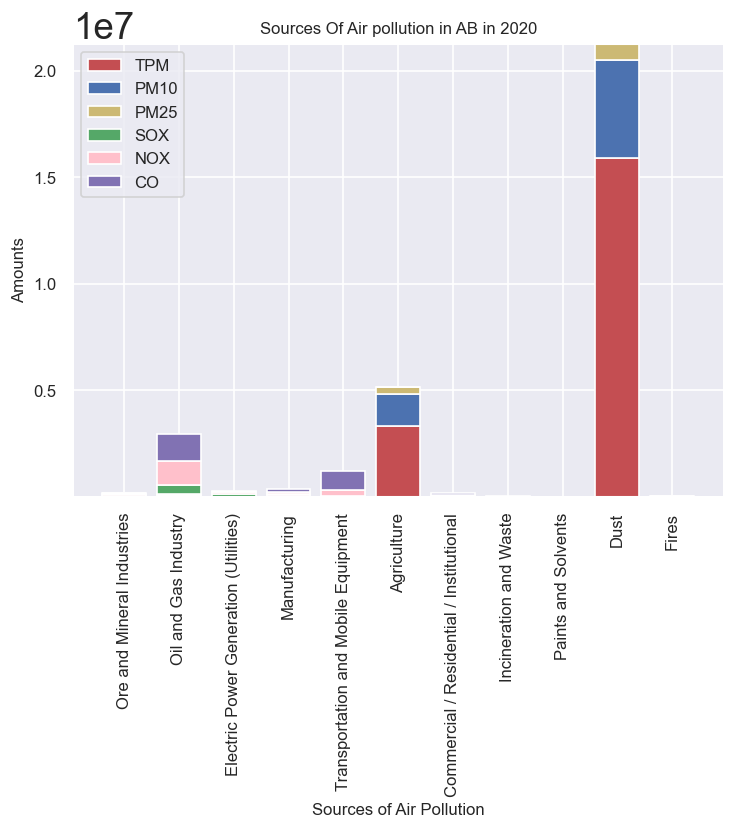

In [62]:
x = AB_S_T['Source']
y1 = AB_S_T['T_TPM']
y2 = AB_S_T['T_PM10']
y3 = AB_S_T['T_PM25']
y4 = AB_S_T['T_SOX']
y5 = AB_S_T['T_NOX']
y6 = AB_S_T['T_CO']
labels=('TPM', 'PM10', 'PM25', 'SOX', 'NOX', 'CO')

# plot bars in stack manner
plt.rcParams["figure.figsize"] = (7,5)
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.bar(x, y5, bottom=y1+y2+y3+y4, color='pink')
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, color='m')
                       
# ax.set_title('Sources Of Air pollution in AB in 2020', fontsize=20)
                       
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Sources Of Air pollution in AB in 2020', fontsize=10)
plt.xlabel('Sources of Air Pollution', fontsize=10)
plt.ylabel('Amounts',fontsize=10)
plt.xticks(rotation=90)
plt.legend(labels, fontsize=10)
plt.show()

In [63]:
air_poll.head(2)

,Index,Region,Source,Sector,Subsector,Is it a total,Year,TPM (t),PM10 (t),PM25 (t),...,Pb (kg),Cd (kg),Hg (kg),D/F (gTEQ),B(a)p,B(b)f,B(k)f,"I(1,2,3-cd)p",PAH (kg),HCB (g)
0,1,AB,Ore and Mineral Industries,NaN,NaN,y,1990-01-01,29239.29007,8851.836473,2610.591646,...,416.163534,5.772593,92.824010,0.002170,0.407351,1.425729,0.505794,0.407351,2.746226,NaN
1,1,BC,Ore and Mineral Industries,NaN,NaN,y,1990-01-01,26865.92752,12479.265200,6080.348059,...,58.651218,1.861156,3084.899405,0.000274,9.164659,12.693427,12.110903,5.062696,39.031685,0.0146


In [64]:
air_poll_BC_2020=air_poll.loc[(air_poll['Region'] == 'BC') & (air_poll['Year']=='2020')]
a=air_poll_BC_2020[['Source', 'TPM (t)','PM10 (t)','PM25 (t)','SOX (t)','NOX (t)','CO (t)']]
BC_S=a.dropna(how='all')
BC_S=BC_S.drop(BC_S[BC_S['Source']=='GRAND TOTAL'].index) 
BC_S = BC_S.groupby('Source').apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)
BC_S=BC_S.fillna(0)
BC_S

C:\Users\harvi\AppData\Local\Temp\ipykernel_40080\3754280266.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  BC_S = BC_S.groupby('Source').apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)


,Source,TPM (t),PM10 (t),PM25 (t),SOX (t),NOX (t),CO (t)
0,Ore and Mineral Industries,167077.715400,79686.399440,10583.814850,13116.955420,8906.789638,44616.091950
1,Ore and Mineral Industries,413.500000,284.610000,254.810000,8801.850000,286.000000,34076.310000
2,Ore and Mineral Industries,413.500000,284.610000,254.810000,8801.850000,286.000000,34076.310000
3,Ore and Mineral Industries,64.988613,57.711419,15.896127,33.018663,56.325954,157.324217
4,Ore and Mineral Industries,4204.603607,1435.079820,678.634049,205.900000,4197.000000,1583.600000
...,...,...,...,...,...,...,...
124,Dust,38212.762580,7678.163437,2023.660860,0.000000,0.000000,0.000000
125,Dust,566364.029500,156285.356200,15545.871260,0.000000,0.000000,0.000000
126,Fires,898.598289,700.970289,640.019112,3.293800,134.661860,7443.531872
127,Fires,876.150800,678.522800,619.234400,3.293800,131.752000,7318.823600


In [65]:
BC_S['T_TPM'] = BC_S.groupby(['Source'])['TPM (t)'].transform('sum')
BC_S['T_PM10'] = BC_S.groupby(['Source'])['PM10 (t)'].transform('sum')
BC_S['T_PM25'] = BC_S.groupby(['Source'])['PM25 (t)'].transform('sum')
BC_S['T_SOX'] = BC_S.groupby(['Source'])['SOX (t)'].transform('sum')
BC_S['T_NOX'] = BC_S.groupby(['Source'])['NOX (t)'].transform('sum')
BC_S['T_CO'] = BC_S.groupby(['Source'])['CO (t)'].transform('sum')


In [66]:
BC_S_T = BC_S.drop_duplicates('Source')
BC_S_T
BC_S_T = BC_S_T.drop(['TPM (t)','PM10 (t)', 'PM25 (t)','SOX (t)','NOX (t)', 'CO (t)'], axis=1)


In [67]:
BC_S_T.loc[:,'Source']

0                    Ore and Mineral Industries
24                         Oil and Gas Industry
39        Electric Power Generation (Utilities)
44                                Manufacturing
68          Transportation and Mobile Equipment
85                                  Agriculture
94     Commercial / Residential / Institutional
104                      Incineration and Waste
115                         Paints and Solvents
120                                        Dust
126                                       Fires
Name: Source, dtype: object

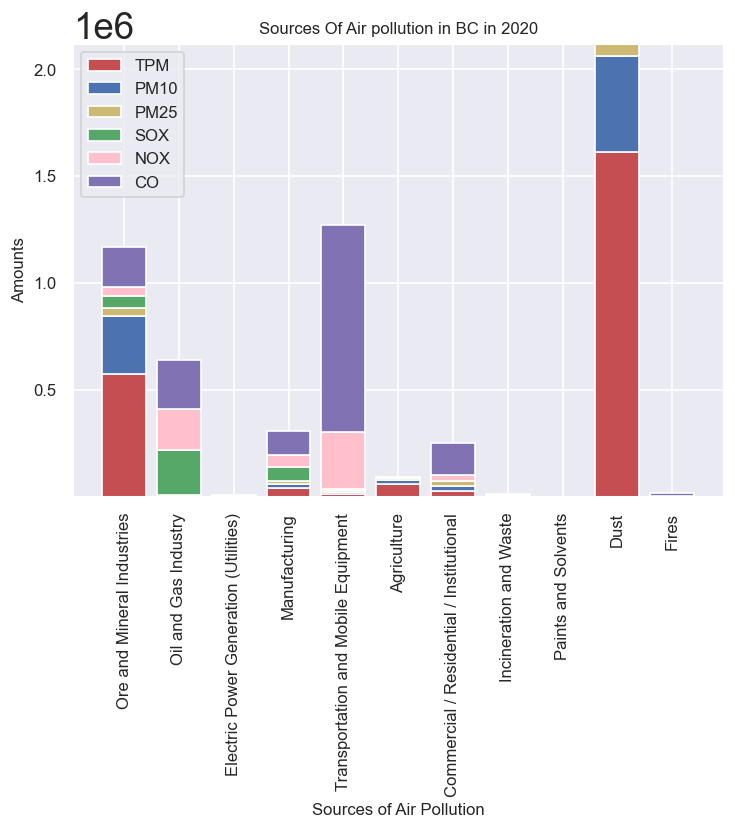

In [68]:
y1 = BC_S_T['T_TPM']
y2 = BC_S_T['T_PM10']
y3 = BC_S_T['T_PM25']
y4 = BC_S_T['T_SOX']
y5 = BC_S_T['T_NOX']
y6 = BC_S_T['T_CO']
labels=('TPM', 'PM10', 'PM25', 'SOX', 'NOX', 'CO')

# plot bars in stack manner
plt.rcParams["figure.figsize"] = (7,5)
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.bar(x, y5, bottom=y1+y2+y3+y4, color='pink')
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, color='m')
                       
# ax.set_title('Sources Of Air pollution in AB in 2020', fontsize=20)
                       
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Sources Of Air pollution in BC in 2020', fontsize=10)
plt.xlabel('Sources of Air Pollution', fontsize=10)
plt.ylabel('Amounts',fontsize=10)
plt.xticks(rotation=90)
plt.legend(labels, fontsize=10)
plt.show()